## TP2.1 : Stratégies d'investissement 

*Notebook fait par Alexandre Boistard, Ethan Trentin.*

Nous allons dans un premier temps télécharger les données en sélectionnant dix titres financiers de secteurs différents (dont un du secteur minier et un du secteur bancaire). 
Nous prenons les actifs suivants : 
- Secteur Technologique : AAPL (Apple Inc.)
- Secteur Énergétique : XOM (Exxon Mobil Corporation)
- Secteur de la Santé : JNJ (Johnson & Johnson)
- Secteur Industriel : CAT (Caterpillar Inc.)
- Secteur des Biens de Consommation : PG (Procter & Gamble Co.)
- Secteur des Télécommunications : VZ (Verizon Communications Inc.)
- Secteur Minier : BHP (BHP Group Limited)
- Secteur Bancaire : JPM (JPMorgan Chase & Co.)
- Secteur Immobilier : SPG (Simon Property Group, Inc.)
- Secteur des Matériaux : FCX (Freeport-McMoRan Inc.)

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
import seaborn as sns
from tqdm import tqdm

In [69]:
# On créé un dataframe poiur stocker les données
df = pd.DataFrame()
tickers = ["AAPL", "XOM", "JNJ", "CAT", "PG", "VZ", "BHP", "JPM","SPG", 
           "FCX",'LULU']
for ticker in tickers:
    df[ticker] = yf.download(ticker, start="2006-01-01", end="2025-03-01")["Close"]
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,XOM,JNJ,CAT,PG,VZ,BHP,JPM,SPG,FCX,LULU
Date,,,,,,,,,,,
2006-01-03,2.249497,30.437786,35.278313,35.372662,34.234398,10.366926,15.559190,24.241713,33.139286,18.278093,NaN
2006-01-04,2.256117,30.489841,35.822117,36.272274,34.298462,10.670629,15.910380,24.101809,33.223778,19.336330,NaN
2006-01-05,2.238362,30.338875,35.673290,36.272274,34.187809,10.793479,15.585859,24.174805,33.591389,18.705271,NaN
2006-01-06,2.296142,30.937519,35.833576,36.994423,34.152866,10.836686,15.892603,24.345129,34.043484,19.106560,NaN
2006-01-09,2.288618,30.921915,36.056824,37.667610,34.409119,10.881620,16.150438,24.740534,34.318142,18.960924,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,247.100006,111.269997,163.740005,338.920013,170.539993,43.320000,51.090000,261.339996,184.649994,37.110001,368.220001
2025-02-25,247.039993,109.730003,166.089996,342.359985,172.649994,43.709999,50.700001,257.399994,183.800003,36.759998,366.720001
2025-02-26,240.360001,109.459999,163.080002,342.579987,171.300003,43.180000,50.220001,258.790009,184.240005,37.950001,366.029999


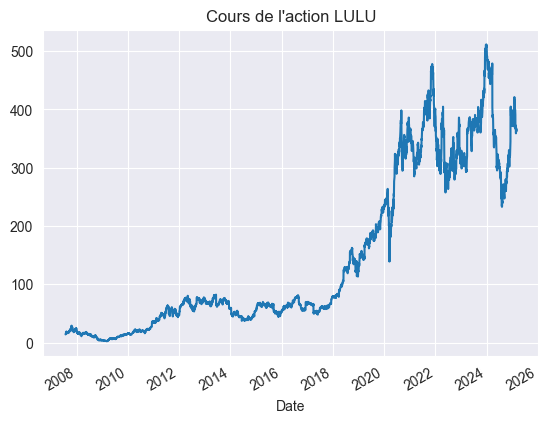

In [70]:
t = "LULU"
df[t].plot()
plt.title(f"Cours de l'action {t}")
plt.show()

In [71]:
# On calcule les log-rendements pour chacun des stocks
for ticker in tickers:
    df[ticker + " Log Returns"] = np.log(df[ticker]).diff()
df = df.dropna()
df

,AAPL,XOM,JNJ,CAT,PG,VZ,BHP,JPM,SPG,FCX,...,XOM Log Returns,JNJ Log Returns,CAT Log Returns,PG Log Returns,VZ Log Returns,BHP Log Returns,JPM Log Returns,SPG Log Returns,FCX Log Returns,LULU Log Returns
Date,,,,,,,,,,,,,,,,,,,,,
2007-07-30,4.256138,46.037804,35.630955,48.552608,38.229645,15.913055,29.243631,28.484447,38.387714,33.136124,...,0.004895,0.005006,0.013328,0.007138,-0.011735,0.043856,0.011688,0.016935,0.041591,0.068326
2007-07-31,3.965132,45.566784,35.886021,49.661823,37.377674,16.338577,29.102171,28.013430,38.467731,33.210346,...,-0.010284,0.007133,0.022589,-0.022538,0.026389,-0.004849,-0.016674,0.002082,0.002237,0.069571
2007-08-01,4.062638,45.946831,36.158867,50.500027,38.163177,16.576250,28.508993,28.248938,38.547752,31.719086,...,0.008306,0.007574,0.016737,0.020798,0.014442,-0.020593,0.008372,0.002078,-0.045943,-0.033537
2007-08-02,4.107473,45.593536,36.200397,50.840347,38.247761,16.534090,28.714325,28.382608,38.827827,32.001778,...,-0.007719,0.001148,0.006716,0.002214,-0.002547,0.007177,0.004721,0.007239,0.008873,0.061457
2007-08-03,3.967840,43.934238,35.915684,49.762669,37.994003,16.388412,27.710487,27.784281,37.800903,30.439854,...,-0.037072,-0.007896,-0.021425,-0.006657,-0.008850,-0.035585,-0.021306,-0.026804,-0.050039,-0.064034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,247.100006,111.269997,163.740005,338.920013,170.539993,43.320000,51.090000,261.339996,184.649994,37.110001,...,0.005226,0.008833,-0.003299,0.001819,0.013011,-0.006827,-0.011036,0.004614,0.003509,0.025442
2025-02-25,247.039993,109.730003,166.089996,342.359985,172.649994,43.709999,50.700001,257.399994,183.800003,36.759998,...,-0.013937,0.014250,0.010099,0.012297,0.008962,-0.007663,-0.015191,-0.004614,-0.009476,-0.004082
2025-02-26,240.360001,109.459999,163.080002,342.579987,171.300003,43.180000,50.220001,258.790009,184.240005,37.950001,...,-0.002464,-0.018289,0.000642,-0.007850,-0.012199,-0.009513,0.005386,0.002391,0.031859,-0.001883


#### 1. Moyennes mobiles

In [21]:
# Question 1. Nous allons d'abord implémenter une stratégie à deux paramètres, 
# par exemple un croisement de moyennes mobiles de longueur A et B (ou EMA avec différents paramètres) sous forme de fonctions.

def ema_crossover_strategy(df, tickers, short_window, long_window):
    """
    Implements a simple EMA crossover strategy.
    
    Args:
        df : pandas.DataFrame
            DataFrame with the adjusted close prices of stocks.
        tickers : list
            List of ticker symbols corresponding to the columns in df.
        short_window : int
            The short EMA window (using half-life or span as intended).
        long_window : int
            The long EMA window.
    
    Returns:
        signals : pandas.DataFrame
            DataFrame with the signals and EMA values for each stock.
    """
    signals = pd.DataFrame(index=df.index)
    
    for stock in tickers:
        # Compute the short and long EMAs. Change half_life to span if desired.
        signals[stock + " Short EMA"] = df[stock].ewm(halflife =short_window).mean()
        signals[stock + " Long EMA"] = df[stock].ewm(halflife =long_window).mean()
        
        # Generate signals: 1 if short EMA > long EMA, else -1.
        signals[stock + " Signal"] = np.where(
            signals[stock + " Short EMA"] > signals[stock + " Long EMA"],
            1,
            -1
        )
    
    return signals


In [22]:
# On applique la stratégie à nos données
signals = ema_crossover_strategy(df, tickers, 10, 50)
signals

,AAPL Short EMA,AAPL Long EMA,AAPL Signal,XOM Short EMA,XOM Long EMA,XOM Signal,JNJ Short EMA,JNJ Long EMA,JNJ Signal,CAT Short EMA,...,BHP Signal,JPM Short EMA,JPM Long EMA,JPM Signal,SPG Short EMA,SPG Long EMA,SPG Signal,FCX Short EMA,FCX Long EMA,FCX Signal
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-04,2.256117,2.256117,-1,30.489841,30.489841,-1,35.822117,35.822117,-1,36.272274,...,-1,24.101809,24.101809,-1,33.223778,33.223778,-1,19.336330,19.336330,-1
2006-01-05,2.246932,2.247178,-1,30.411743,30.413835,-1,35.745126,35.747188,-1,36.272274,...,-1,24.139571,24.138560,1,33.413951,33.408857,1,19.009870,19.018614,-1
2006-01-06,2.264484,2.263726,1,30.599280,30.590822,1,35.776675,35.776384,1,36.529855,...,-1,24.212891,24.208373,1,33.638497,33.623339,1,19.044358,19.048336,-1
2006-01-09,2.271159,2.270079,1,30.688509,30.675324,1,35.854153,35.847959,1,36.844514,...,1,24.358816,24.344192,1,33.826460,33.800668,1,19.021283,19.026027,-1
2006-01-10,2.308246,2.303648,1,30.796626,30.775249,1,35.914885,35.903840,1,36.997720,...,1,24.454438,24.433177,1,34.021963,33.981758,1,19.181366,19.168991,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,238.430899,229.345324,1,109.249760,111.312185,-1,153.127768,151.677773,1,362.976443,...,-1,265.457995,236.114889,1,180.112747,169.433452,1,38.311148,41.841665,-1
2025-02-25,239.007424,229.588931,1,109.281921,111.290402,-1,153.995809,151.876190,1,361.595821,...,-1,264.918375,236.407928,1,180.359672,169.631241,1,38.207272,41.771704,-1
2025-02-26,239.098002,229.737220,1,109.293846,111.265203,-1,154.604150,152.030437,1,360.322387,...,-1,264.507977,236.716068,1,180.619526,169.832364,1,38.190043,41.719090,-1


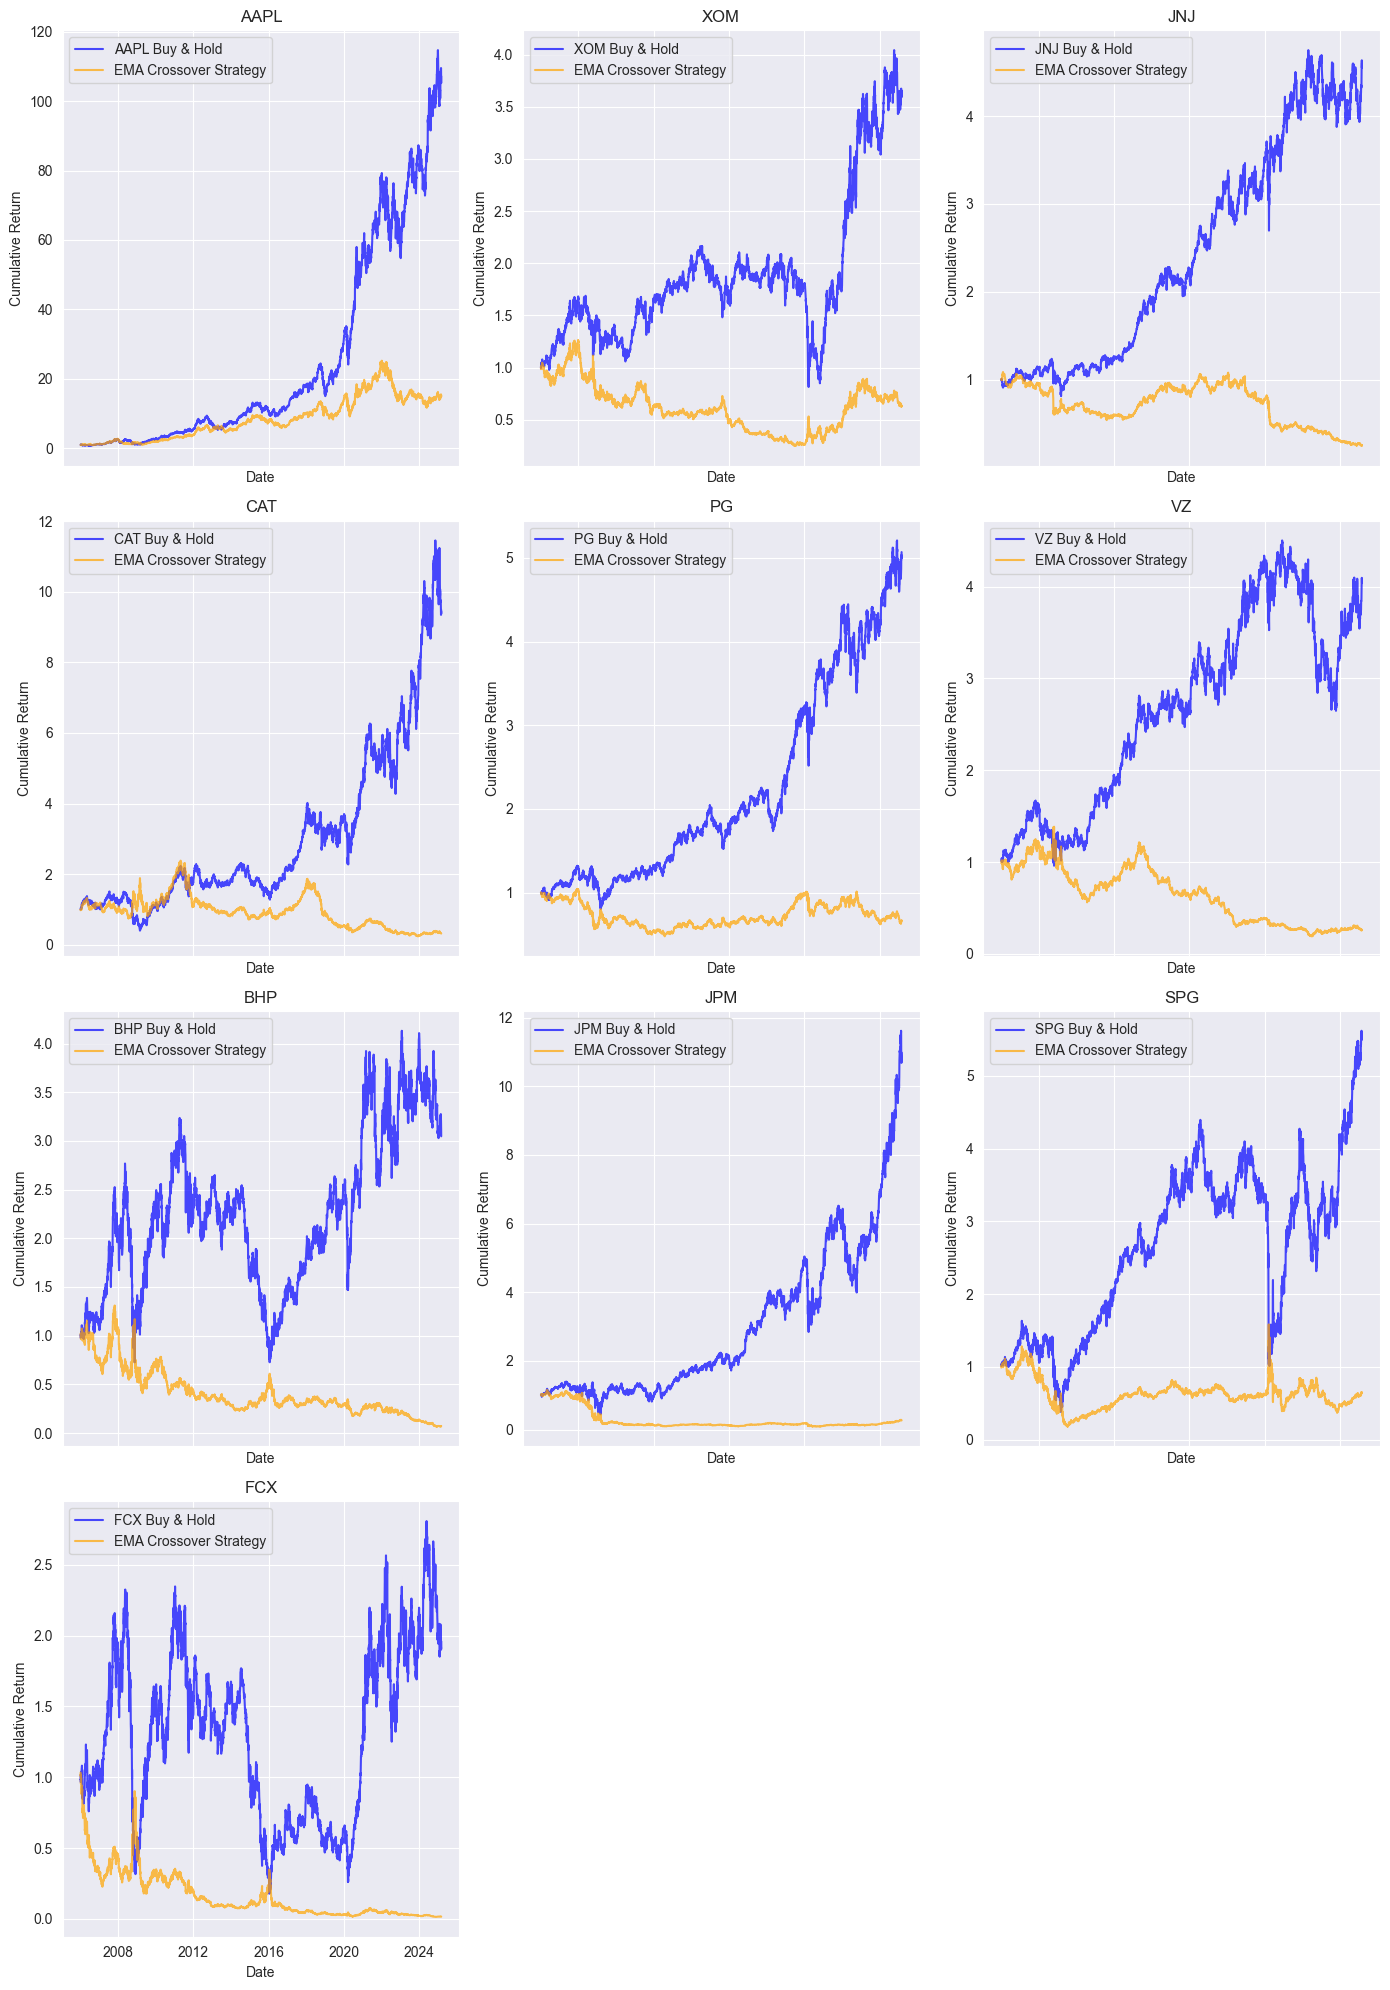

In [23]:
# On visualise pour des valeurs arbitraires de A et B 

df_question1 = df.copy()
for stock in tickers:
    df_question1.loc[:, stock + '_return'] = df_question1[stock].pct_change()
    df_question1.loc[:, stock + '_Strategy_return'] = signals[stock + (' '
                                                                       'Signal')].shift(1) * df_question1[stock + '_return']
    df_question1.loc[:, 'Cumulative_' + stock] = (1 + df_question1[stock + '_return']).cumprod()
    df_question1.loc[:, stock + '_Cumulative_Strategy'] = (1 + df_question1[stock + '_Strategy_return']).cumprod()

n_tickers = len(tickers)
ncols = 3
nrows = math.ceil(n_tickers / ncols)

# Create a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 5 * nrows), sharex=True, 
                         sharey=False)
axes = axes.flatten()  

for idx, stock in enumerate(tickers):
    ax = axes[idx]
    ax.plot(df_question1.index, df_question1['Cumulative_' + stock],
            label=stock + ' Buy & Hold', color='blue', alpha=0.7)
    ax.plot(df_question1.index, df_question1[stock + '_Cumulative_Strategy'],
            label='EMA Crossover Strategy', color='orange', alpha=0.7)
    ax.set_title(f'{stock}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Return')
    ax.legend()
    ax.grid(True)

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Processing AAPL : 100%|██████████| 100/100 [00:20<00:00,  4.97it/s]


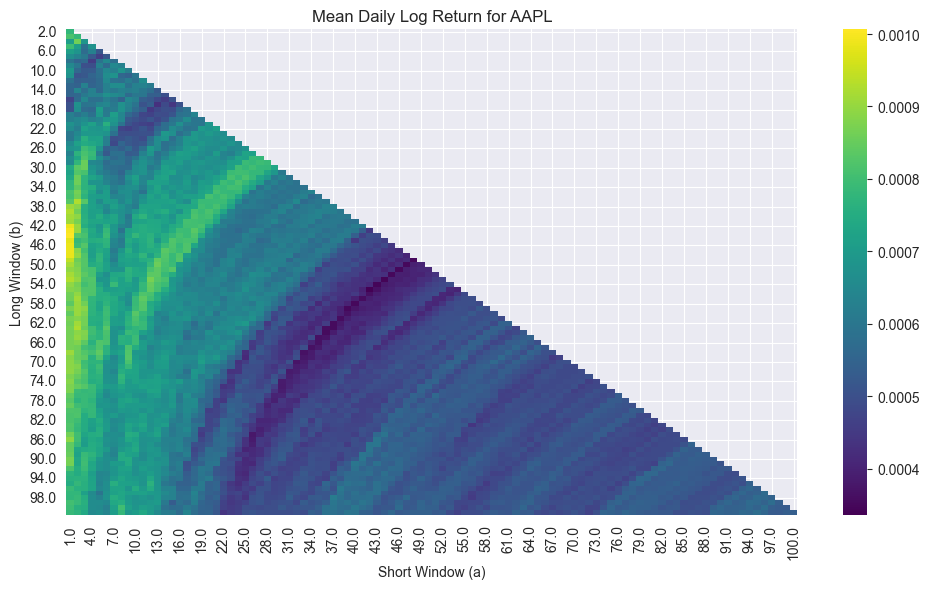

Processing XOM : 100%|██████████| 100/100 [00:20<00:00,  4.97it/s]


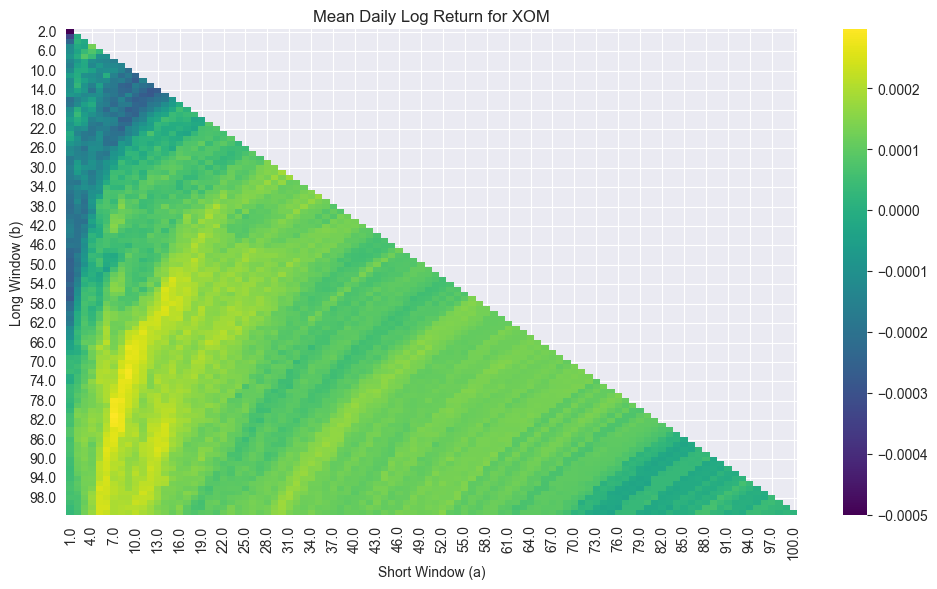

Processing JNJ : 100%|██████████| 100/100 [00:19<00:00,  5.17it/s]


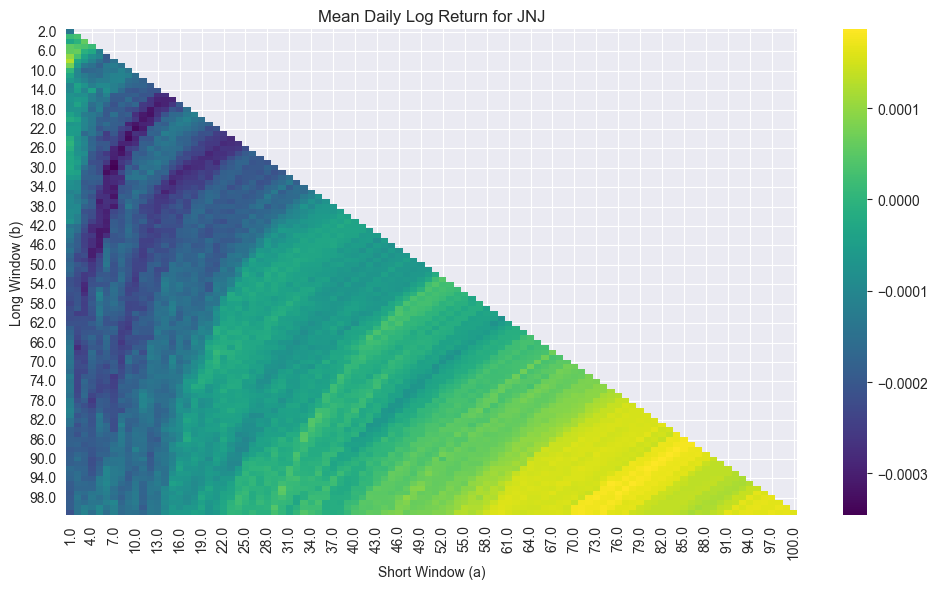

Processing CAT : 100%|██████████| 100/100 [00:19<00:00,  5.19it/s]


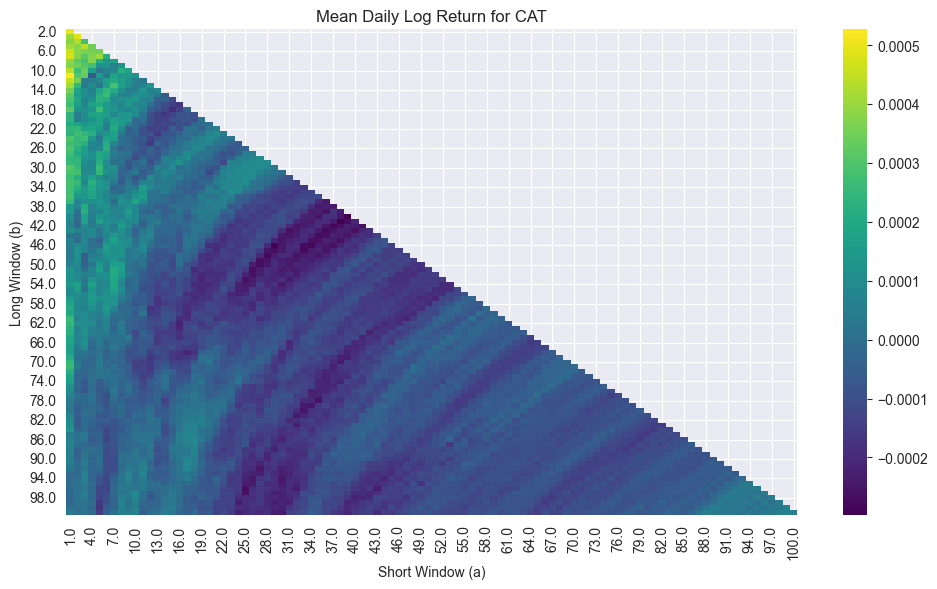

Processing PG : 100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


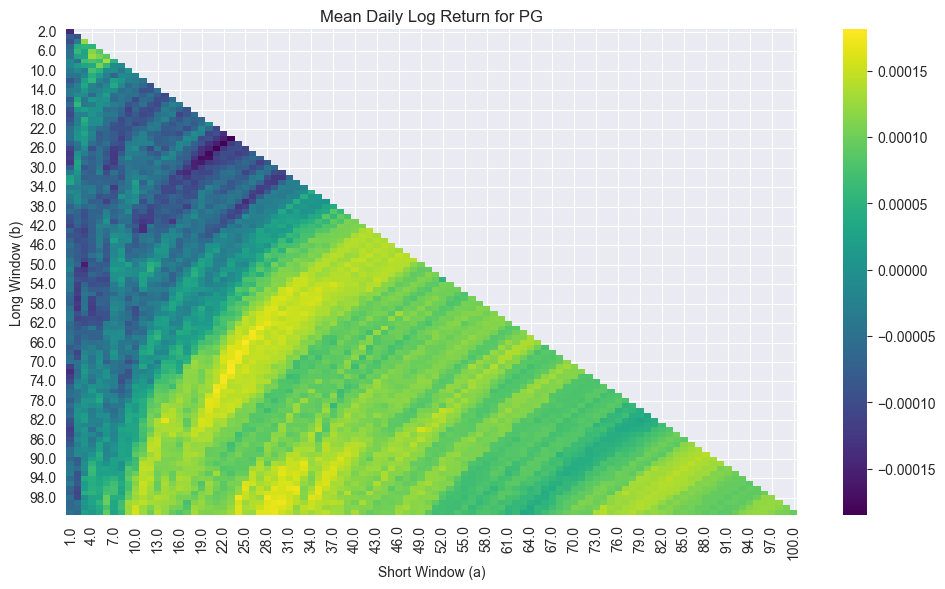

Processing VZ : 100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


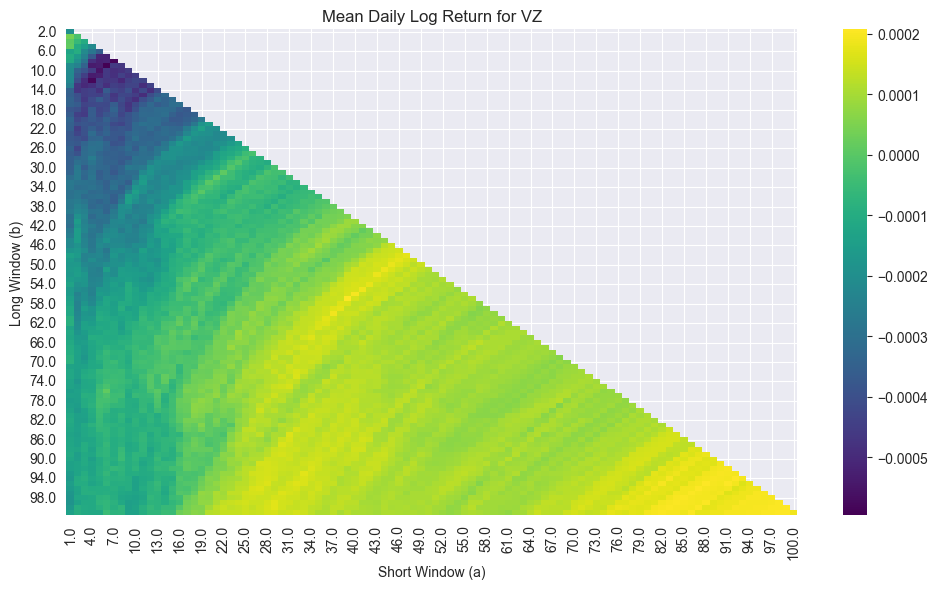

Processing BHP : 100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


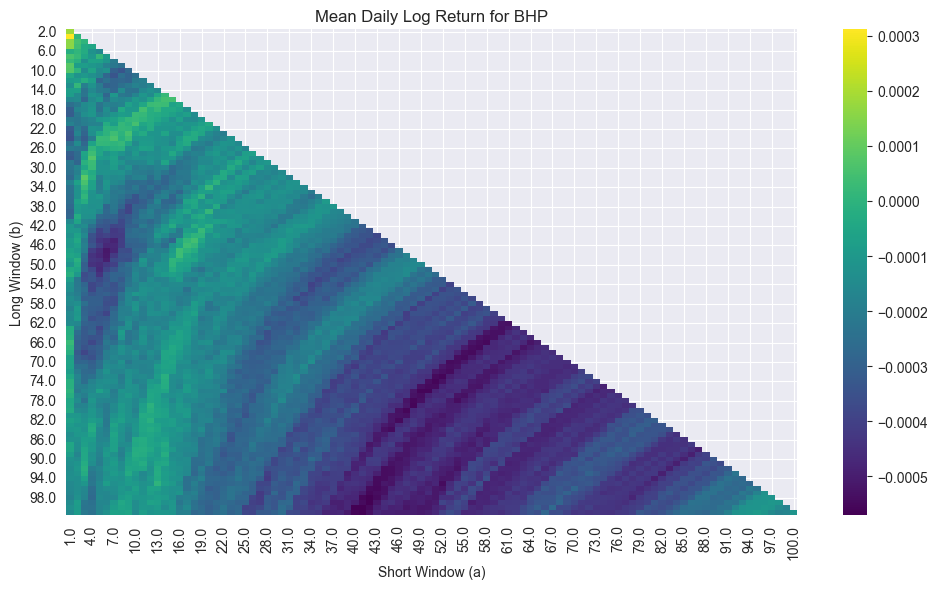

Processing JPM : 100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


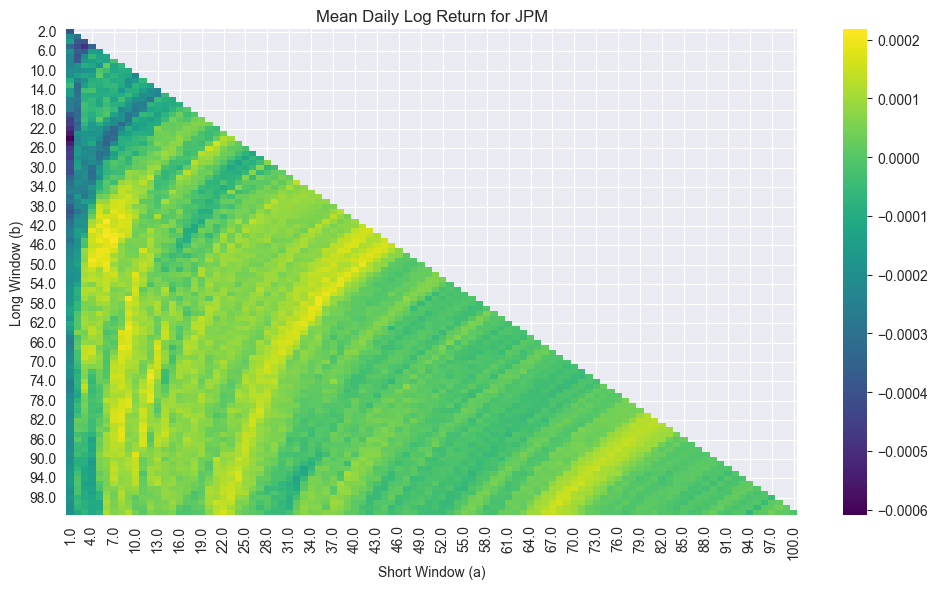

Processing SPG : 100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


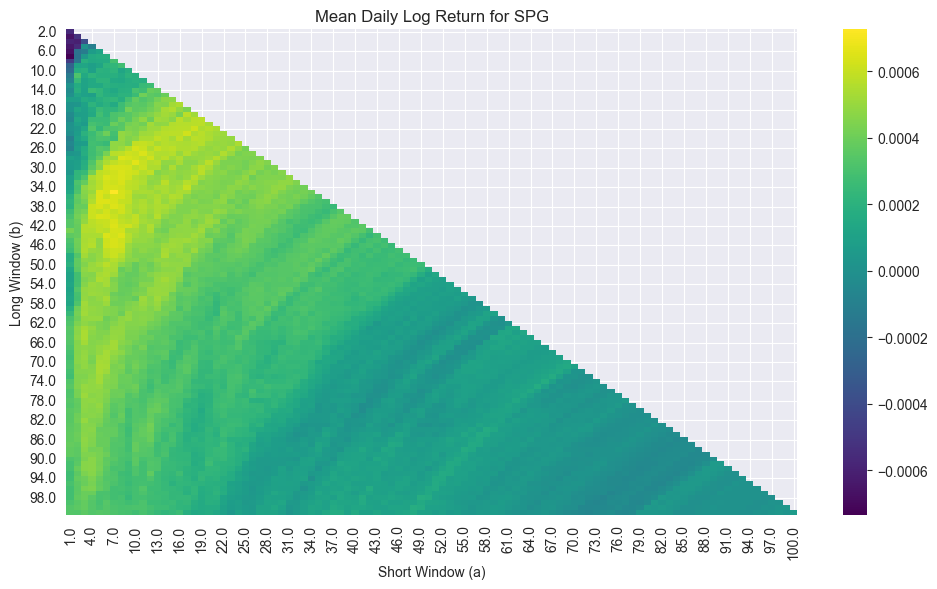

Processing FCX : 100%|██████████| 100/100 [00:21<00:00,  4.68it/s]


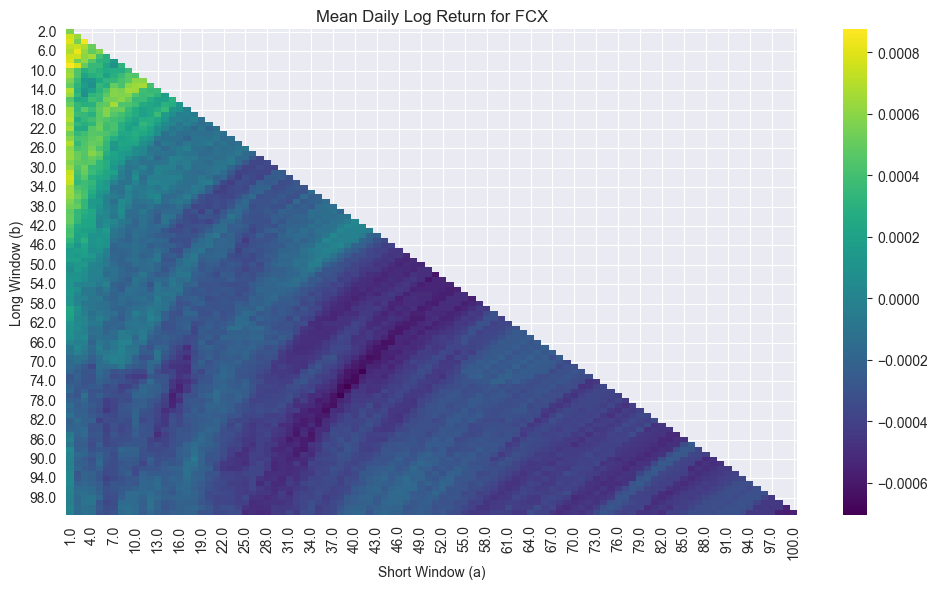

In [24]:
A_values = np.linspace(1, 100, 100)  # Short window values
B_values = np.linspace(2, 101, 100)  # Long window values
tickers = tickers 
#tickers = ["AAPL"]
def compute_mean_log_return(df, signals, stock):
    df_copy = df.copy()
    df_copy[stock + '_log_return'] = np.log(df_copy[stock] / df_copy[stock].shift(1))
    df_copy[stock + '_Strategy_log_return'] = signals[stock + ' Signal'].shift(1) * df_copy[stock + '_log_return']
    return df_copy[stock + '_Strategy_log_return'].mean()

for stock in tickers:
    heatmap_data = np.full((len(B_values), len(A_values)), np.nan)
    for j, b in tqdm(enumerate(B_values), total=len(B_values), desc=f"Processing {stock} "):
        for i, a in enumerate(A_values):
            if int(a) < int(b):
                signals = ema_crossover_strategy(df, [stock], int(a), int(b))
                mean_return = compute_mean_log_return(df, signals, stock)
                heatmap_data[j, i] = mean_return
    df_heatmap = pd.DataFrame(heatmap_data, index=B_values, columns=A_values)
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_heatmap, annot=False, fmt=".4f", cmap="viridis", center=0)
    plt.title(f"Mean Daily Log Return for {stock}")
    plt.xlabel("Short Window (a)")
    plt.ylabel("Long Window (b)")
    plt.tight_layout()
    plt.show()


Processing AAPL : 100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


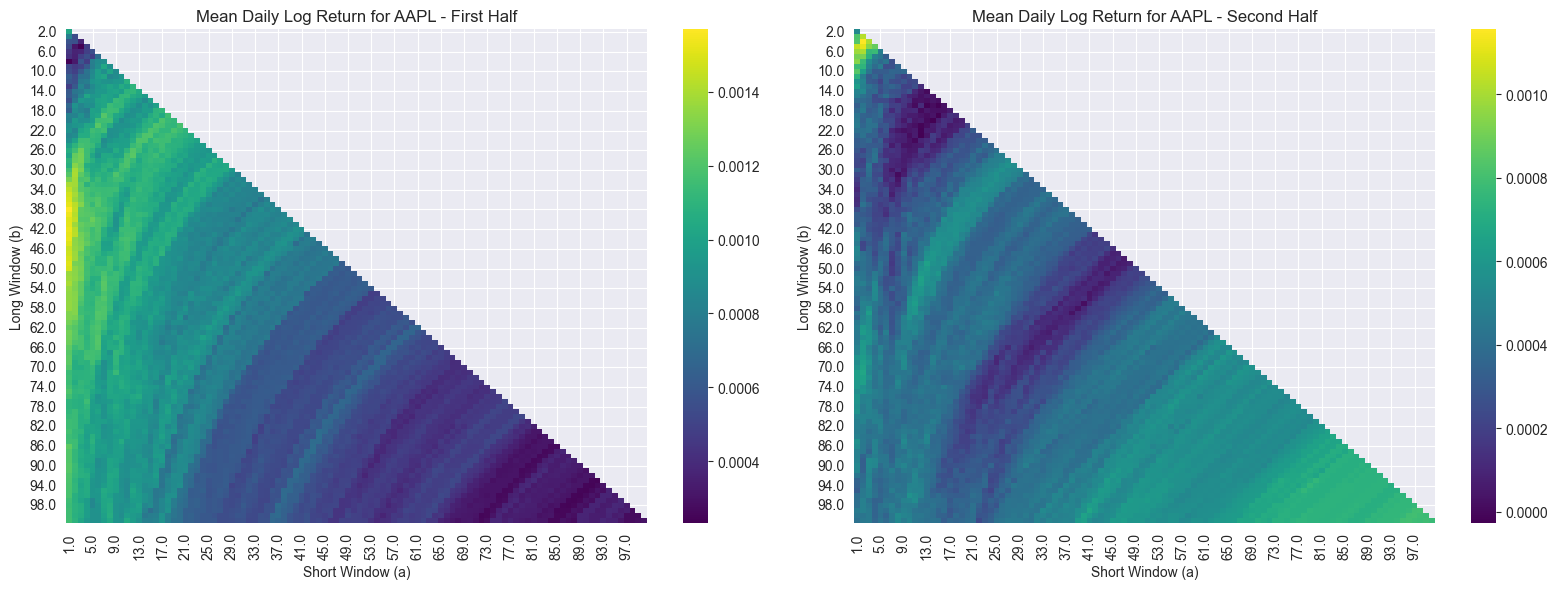

In [25]:
# Question 4 : on modifie un peu pour étudier la stationnarité des rendements
A_values = np.linspace(1, 100, 100)  # Short window values
B_values = np.linspace(2, 101, 100)  # Long window values
#tickers = tickers 
tickers = ["AAPL"]
def compute_mean_log_return(df, signals, stock):
    df_copy = df.copy()
    df_copy[stock + '_log_return'] = np.log(df_copy[stock] / df_copy[stock].shift(1))
    df_copy[stock + '_Strategy_log_return'] = signals[stock + ' Signal'].shift(1) * df_copy[stock + '_log_return']
    mid = len(df_copy) // 2
    return [df_copy[stock + '_Strategy_log_return'].iloc[:mid].mean(), 
            df_copy[stock + '_Strategy_log_return'].iloc[mid:].mean()]

for stock in tickers:
    heatmap_data_1 = np.full((len(B_values), len(A_values)), np.nan)
    heatmap_data_2 = np.full((len(B_values), len(A_values)), np.nan)
    for j, b in tqdm(enumerate(B_values), total=len(B_values), desc=f"Processing {stock} "):
        for i, a in enumerate(A_values):
            if int(a) < int(b):
                signals = ema_crossover_strategy(df, [stock], int(a), int(b))
                mean_return = compute_mean_log_return(df, signals, stock)
                heatmap_data_1[j, i] = mean_return[0]
                heatmap_data_2[j, i] = mean_return[1]
    df_heatmap_1 = pd.DataFrame(heatmap_data_1, index=B_values, 
                                columns=A_values)
    df_heatmap_2 = pd.DataFrame(heatmap_data_2, index=B_values, 
                                columns=A_values)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.heatmap(df_heatmap_1, ax=axes[0], annot=False, fmt=".4f", cmap="viridis", center=0)
    sns.heatmap(df_heatmap_2, ax=axes[1], annot=False, fmt=".4f", cmap="viridis", center=0)
    axes[0].set_title(f"Mean Daily Log Return for {stock} - First Half")
    axes[1].set_title(f"Mean Daily Log Return for {stock} - Second Half")
    axes[0].set_xlabel("Short Window (a)")
    axes[0].set_ylabel("Long Window (b)")
    axes[1].set_xlabel("Short Window (a)")
    axes[1].set_ylabel("Long Window (b)")
    plt.tight_layout()
    plt.show()

#### 2. Strats de Mean Reversion

In [26]:
## on reprend le code de la partie 1
# On créé un dataframe poiur stocker les données
df = pd.DataFrame()
tickers = ["AAPL", "XOM", "JNJ", "CAT", "PG", "VZ", "BHP", "JPM","SPG", "FCX"]
for ticker in tickers:
    df[ticker] = yf.download(ticker, start="2006-01-01", end="2025-03-01")["Close"]
    df[ticker + " Log Returns"] = np.log(df[ticker]).diff()
df = df.dropna()
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,AAPL Log Returns,XOM,XOM Log Returns,JNJ,JNJ Log Returns,CAT,CAT Log Returns,PG,PG Log Returns,VZ,VZ Log Returns,BHP,BHP Log Returns,JPM,JPM Log Returns,SPG,SPG Log Returns,FCX,FCX Log Returns
Date,,,,,,,,,,,,,,,,,,,,
2006-01-04,2.256117,0.002939,30.489841,0.001709,35.822117,0.015297,36.272274,0.025114,34.298462,0.001870,10.670629,0.028874,15.910380,0.022320,24.101809,-0.005788,33.223778,0.002546,19.336330,0.056282
2006-01-05,2.238362,-0.007901,30.338875,-0.004964,35.673290,-0.004163,36.272274,0.000000,34.187809,-0.003231,10.793479,0.011447,15.585859,-0.020608,24.174805,0.003024,33.591389,0.011004,18.705271,-0.033180
2006-01-06,2.296142,0.025486,30.937519,0.019540,35.833576,0.004483,36.994423,0.019714,34.152866,-0.001023,10.836686,0.003995,15.892603,0.019490,24.345129,0.007021,34.043484,0.013369,19.106560,0.021226
2006-01-09,2.288618,-0.003282,30.921915,-0.000504,36.056824,0.006211,37.667610,0.018033,34.409119,0.007475,10.881620,0.004138,16.150438,0.016093,24.740534,0.016111,34.318142,0.008035,18.960924,-0.007651
2006-01-10,2.433368,0.061328,31.161381,0.007714,36.119778,0.001744,37.514591,-0.004071,34.275162,-0.003901,10.926555,0.004121,15.919275,-0.014417,24.777035,0.001474,34.681530,0.010533,19.721436,0.039326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,247.100006,0.006293,111.269997,0.005226,163.740005,0.008833,338.920013,-0.003299,170.539993,0.001819,43.320000,0.013011,51.090000,-0.006827,261.339996,-0.011036,184.649994,0.004614,37.110001,0.003509
2025-02-25,247.039993,-0.000243,109.730003,-0.013937,166.089996,0.014250,342.359985,0.010099,172.649994,0.012297,43.709999,0.008962,50.700001,-0.007663,257.399994,-0.015191,183.800003,-0.004614,36.759998,-0.009476
2025-02-26,240.360001,-0.027412,109.459999,-0.002464,163.080002,-0.018289,342.579987,0.000642,171.300003,-0.007850,43.180000,-0.012199,50.220001,-0.009513,258.790009,0.005386,184.240005,0.002391,37.950001,0.031859


In [77]:
def mean_revert_strategy(df, tickers, time_window, k):
    """
    Implements a simple mean reversion strategy.
    
    Args:
        df : pandas.DataFrame
            DataFrame with the adjusted close prices of stocks.
        tickers : list
            List of ticker symbols corresponding to the columns in df.
        time_window : int
            The time on which the mean and standard deviation are computed.
        k : int
            The number of standard deviations for the threshold.
    
    Returns:
        signals : pandas.DataFrame
            DataFrame with the signals and MA values for each stock.
    """
    signals = pd.DataFrame(index=df.index)
    
    for stock in tickers:
        # Compute the MA.
        signals[stock + " MA"] = df[stock].rolling(window=time_window).mean()

        # Generate signals: -1 if > k*simga, 0 between, else 1.
        signals[stock + " Signal"] = np.where(
            df[stock] > signals[stock + " MA"] + k * df[stock].rolling(window=time_window).std(),
            -1,
            np.where(
                df[stock] < signals[stock + " MA"] - k * df[stock].rolling(window=time_window).std(),
                1,
                0
            )
        )
    
    return signals


In [78]:
# On applique la stratégie à nos données
signals = mean_revert_strategy(df, tickers, 200, 1)
signals
## NB: il y aura toujours des NaN au début pour les MA; auquel cas le signal 
# vaudra 0 et donc pas de trade de toutes façons

,AAPL MA,AAPL Signal,XOM MA,XOM Signal,JNJ MA,JNJ Signal,CAT MA,CAT Signal,PG MA,PG Signal,...,BHP MA,BHP Signal,JPM MA,JPM Signal,SPG MA,SPG Signal,FCX MA,FCX Signal,LULU MA,LULU Signal
Date,,,,,,,,,,,,,,,,,,,,,
2007-07-30,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2007-07-31,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2007-08-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2007-08-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2007-08-03,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,224.242096,-1,112.752788,0,151.847678,-1,359.640194,0,166.830277,0,...,53.888086,0,222.729016,-1,163.111685,-1,44.565635,1,316.67840,-1
2025-02-25,224.569582,-1,112.739554,0,151.957642,-1,359.646393,0,166.879461,-1,...,53.862159,0,223.073226,-1,163.317891,-1,44.494993,1,316.76275,0
2025-02-26,224.861976,0,112.725067,0,152.051441,-1,359.656165,0,166.925285,-1,...,53.838548,1,223.405210,-1,163.526635,-1,44.437381,1,316.86485,0


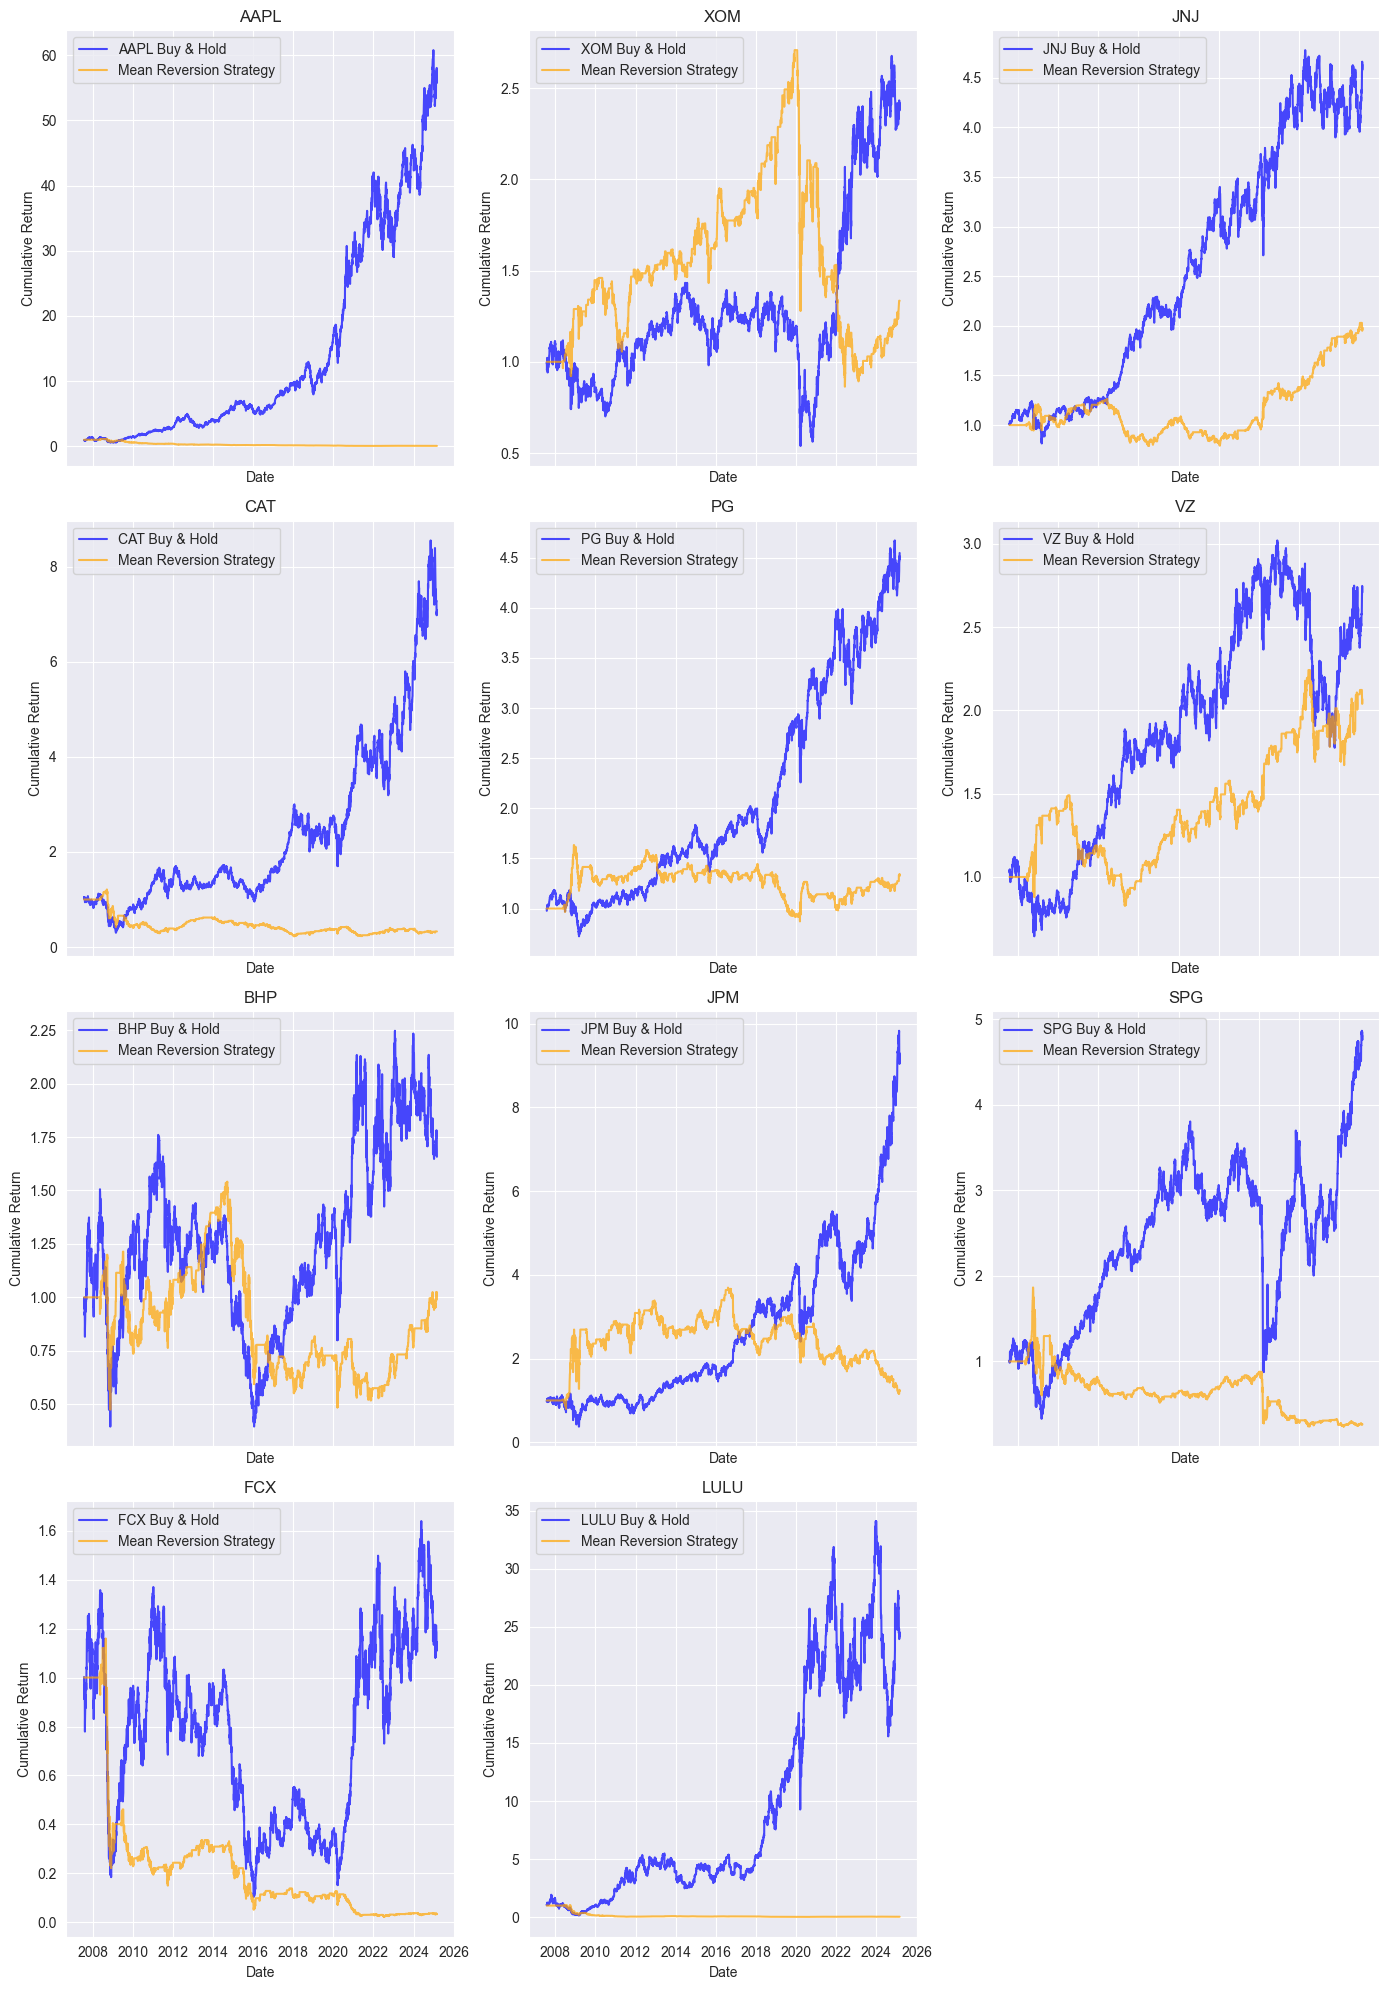

In [79]:
# On visualise pour des valeurs arbitraires de A et B 

df_question1 = df.copy()
for stock in tickers:
    df_question1.loc[:, stock + '_return'] = df_question1[stock].pct_change()
    df_question1.loc[:, stock + '_Strategy_return'] = signals[stock + ' Signal'].shift(1) * df_question1[stock + '_return']
    df_question1.loc[:, 'Cumulative_' + stock] = (1 + df_question1[stock + '_return']).cumprod()
    df_question1.loc[:, stock + '_Cumulative_Strategy'] = (1 + df_question1[stock + '_Strategy_return']).cumprod()

n_tickers = len(tickers)
ncols = 3
nrows = math.ceil(n_tickers / ncols)

# Create a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 5 * nrows), sharex=True, 
                         sharey=False)
axes = axes.flatten()  

for idx, stock in enumerate(tickers):
    ax = axes[idx]
    ax.plot(df_question1.index, df_question1['Cumulative_' + stock],
            label=stock + ' Buy & Hold', color='blue', alpha=0.7)
    ax.plot(df_question1.index, df_question1[stock + '_Cumulative_Strategy'],
            label='Mean Reversion Strategy', color='orange', alpha=0.7)
    ax.set_title(f'{stock}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Return')
    ax.legend()
    ax.grid(True)

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Processing AAPL: 100%|██████████| 100/100 [01:00<00:00,  1.64it/s]


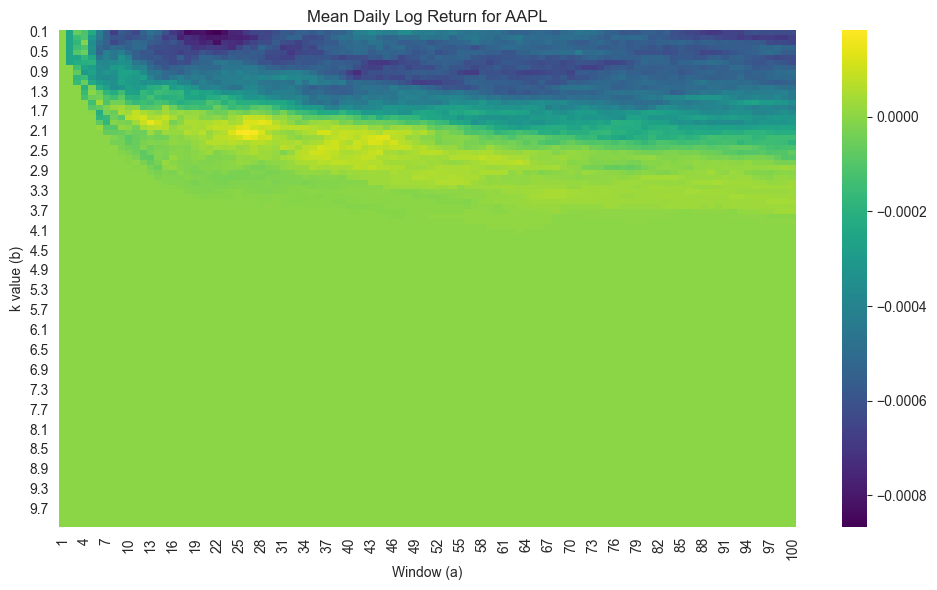

Processing XOM: 100%|██████████| 100/100 [00:51<00:00,  1.96it/s]


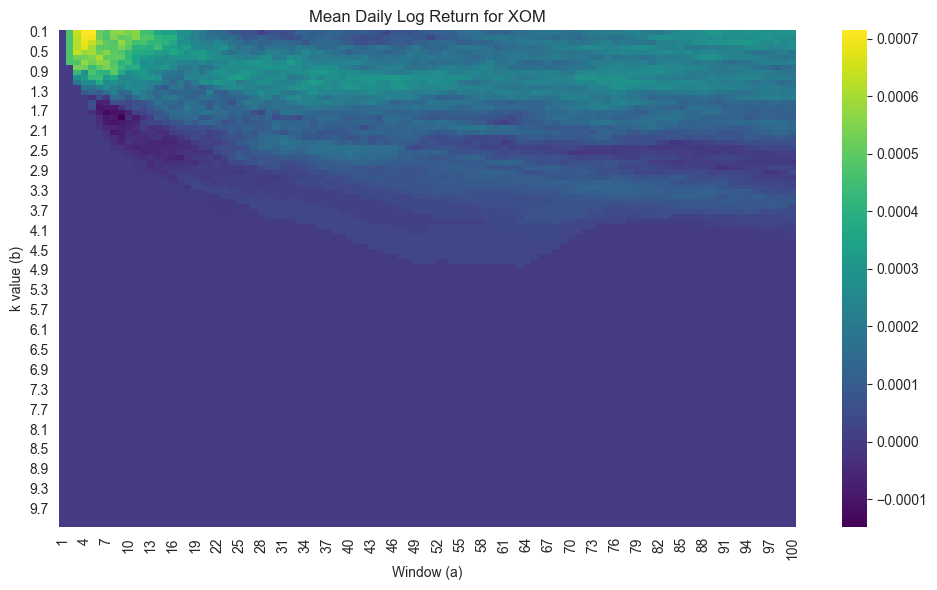

Processing JNJ: 100%|██████████| 100/100 [01:00<00:00,  1.66it/s]


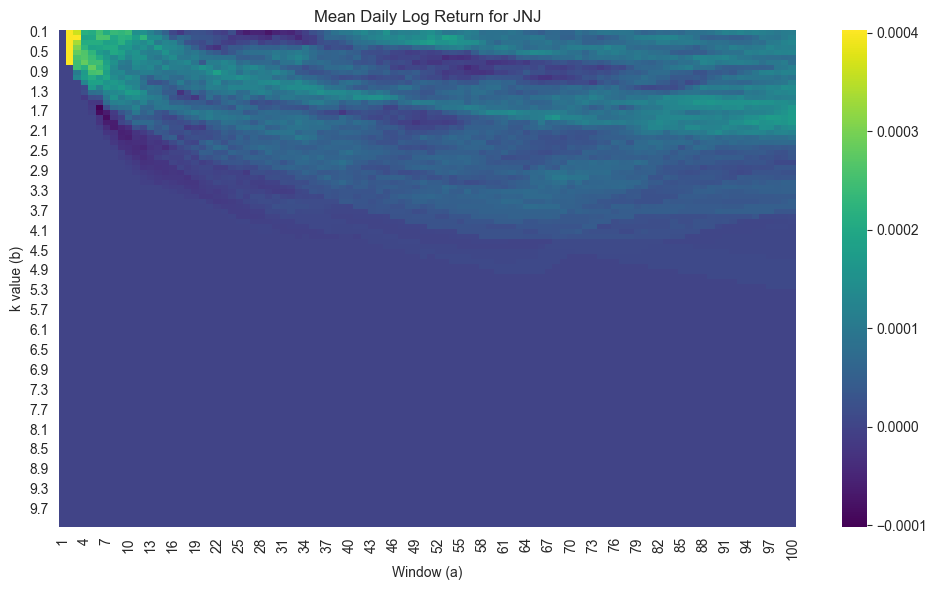

Processing CAT: 100%|██████████| 100/100 [00:58<00:00,  1.71it/s]


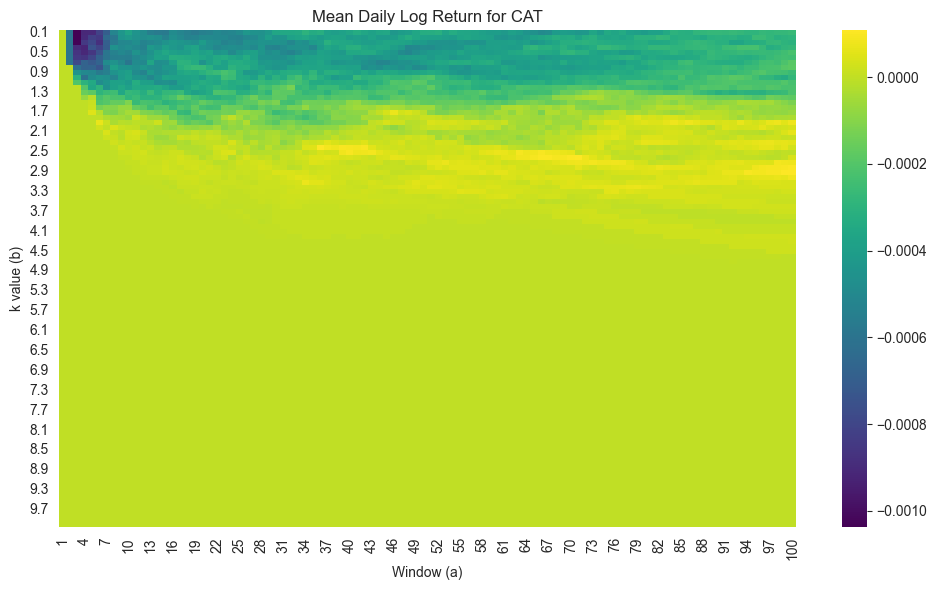

Processing PG: 100%|██████████| 100/100 [00:59<00:00,  1.67it/s]


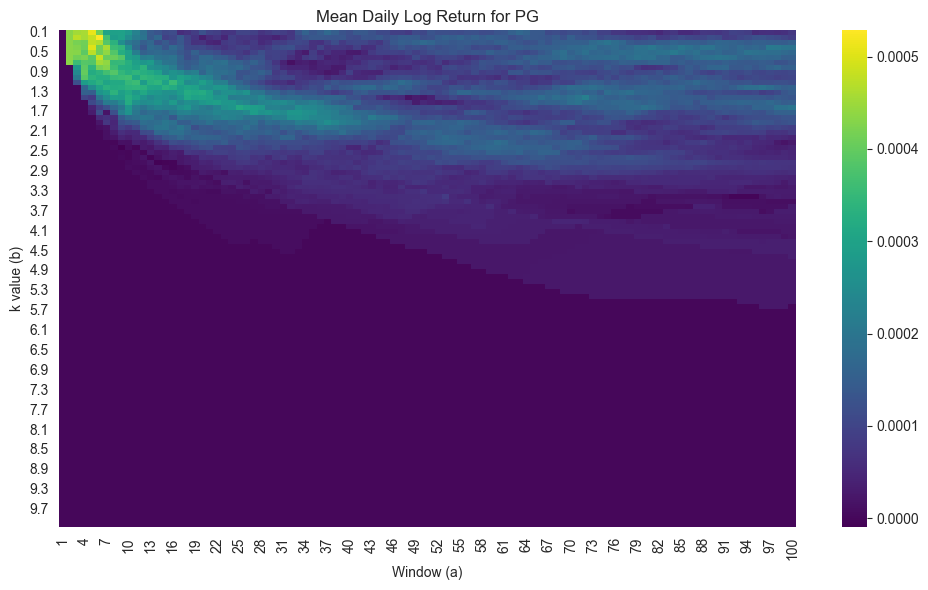

Processing VZ: 100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


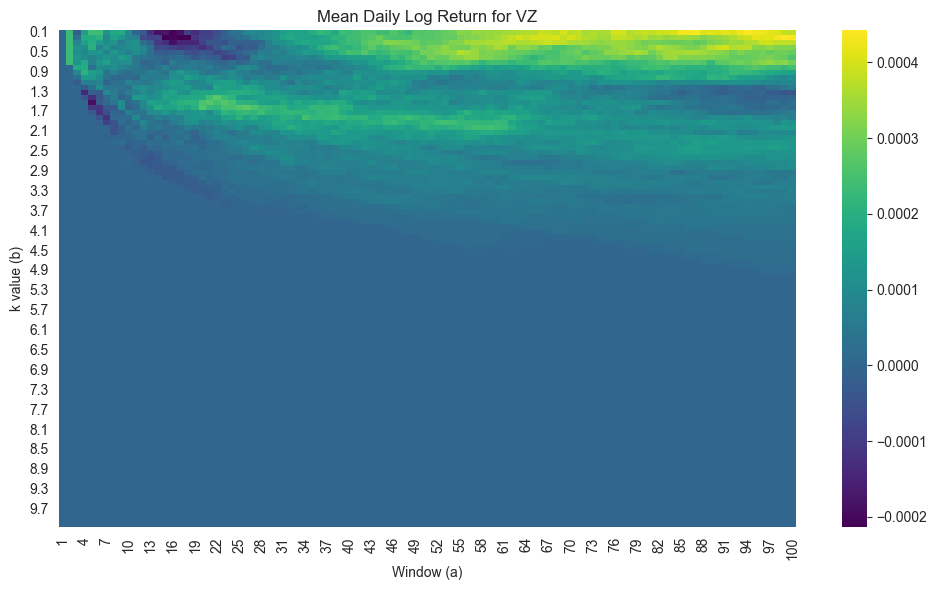

Processing BHP: 100%|██████████| 100/100 [00:47<00:00,  2.09it/s]


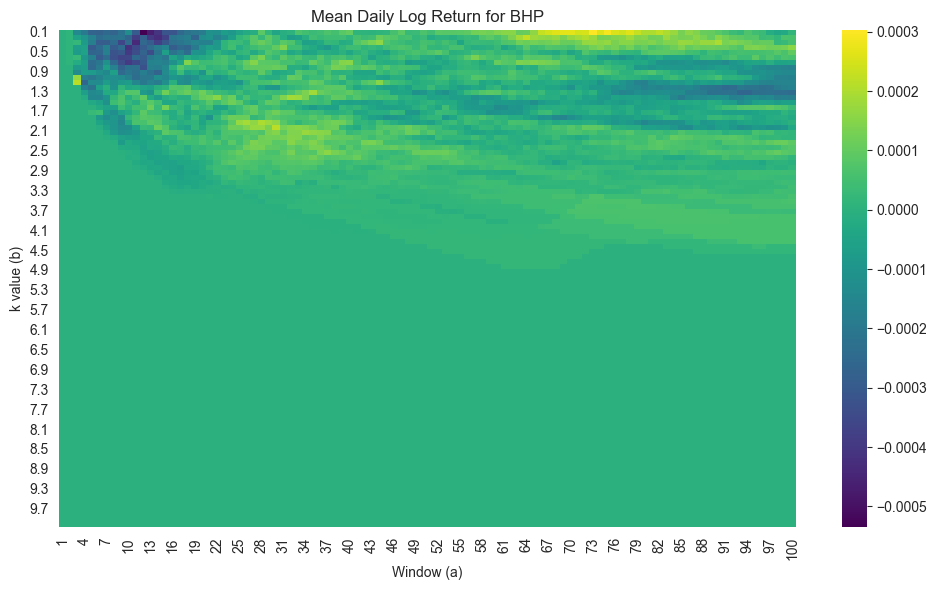

Processing JPM: 100%|██████████| 100/100 [00:24<00:00,  4.02it/s]


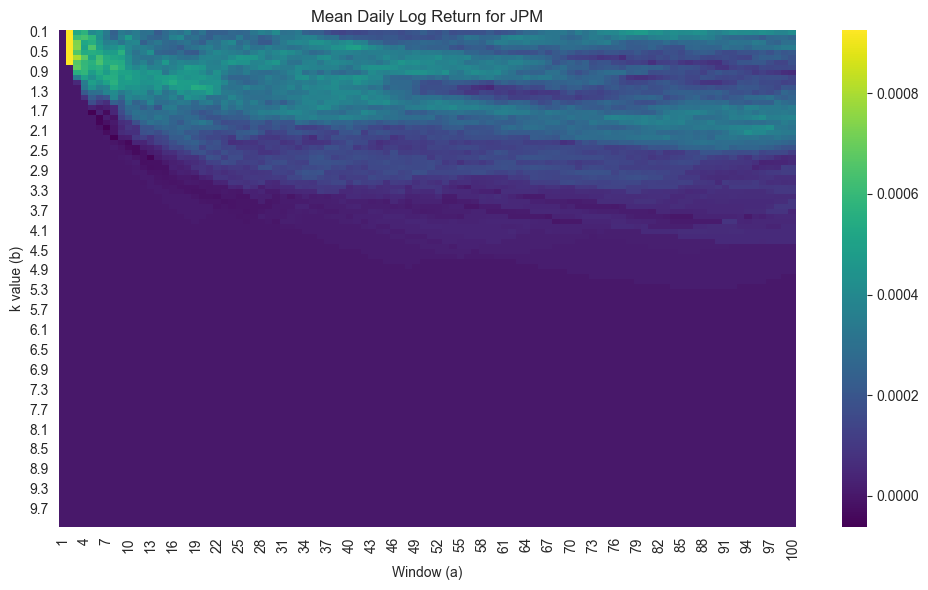

Processing SPG: 100%|██████████| 100/100 [00:24<00:00,  4.14it/s]


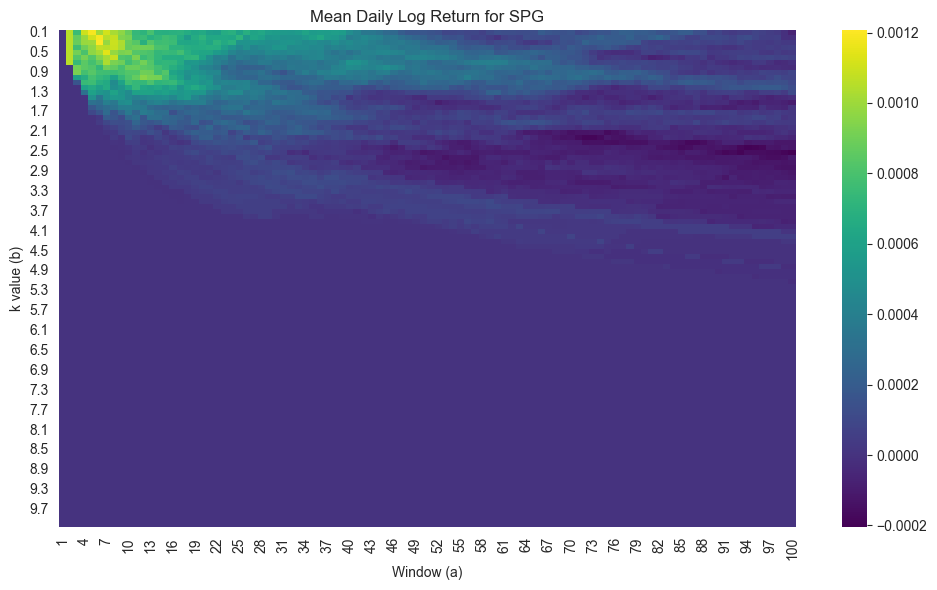

Processing FCX: 100%|██████████| 100/100 [00:25<00:00,  3.91it/s]


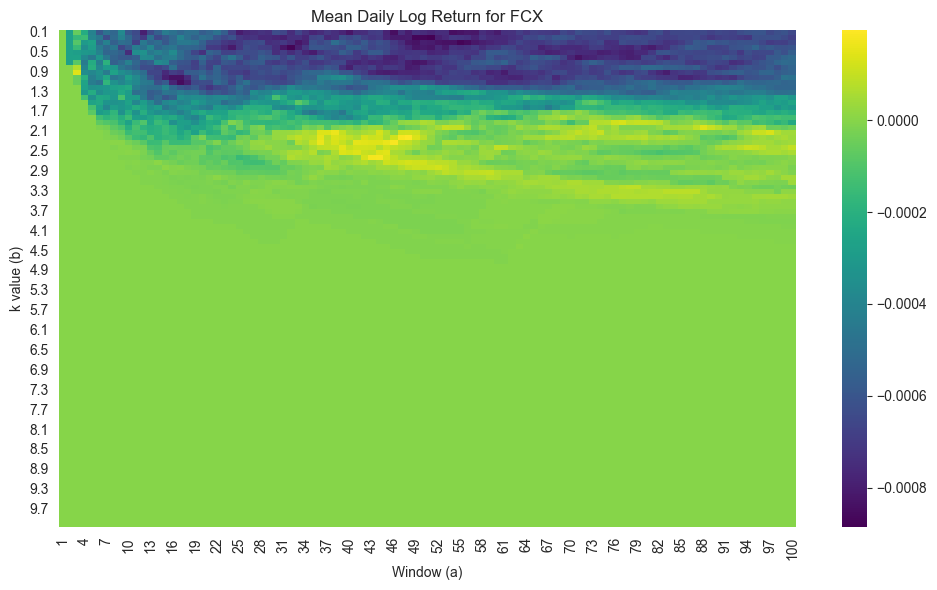

In [30]:
# Define parameter grids.
A_values = np.linspace(1, 100, 100, dtype=int)  # window values as integers
B_values = np.linspace(1, 100, 100) / 10         # k values

# Define tickers explicitly.
tickers = ["AAPL", "XOM", "JNJ", "CAT", "PG", "VZ", "BHP", "JPM","SPG", "FCX"]
#tickers = ["AAPL"]  

def compute_mean_log_return(df, signals, stock):
    df_copy = df.copy()
    df_copy[stock + '_log_return'] = np.log(df_copy[stock] / df_copy[stock].shift(1))
    df_copy[stock + '_Strategy_log_return'] = signals[stock + ' Signal'].shift(1) * df_copy[stock + '_log_return']
    return df_copy[stock + '_Strategy_log_return'].mean()

for stock in tickers:
    heatmap_data = np.full((len(B_values), len(A_values)), np.nan)
    for j, b in tqdm(enumerate(B_values), total=len(B_values), desc=f"Processing {stock}"):
        for i, a in enumerate(A_values):
            # Compute signals for each parameter combination.
            signals = mean_revert_strategy(df, [stock], a, b)
            mean_return = compute_mean_log_return(df, signals, stock)
            heatmap_data[j, i] = mean_return

    # Create a DataFrame where rows correspond to k values and columns to window sizes.
    df_heatmap = pd.DataFrame(heatmap_data, index=B_values, columns=A_values)
    df_heatmap.replace([np.inf, -np.inf], 0, inplace=True)
    # Plot the heatmap.
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_heatmap, annot=False, fmt=".4f", cmap="viridis", center=0)
    plt.title(f"Mean Daily Log Return for {stock}")
    plt.xlabel("Window (a)")
    plt.ylabel("k value (b)")
    plt.tight_layout()
    plt.show()

Processing SPG: 100%|██████████| 100/100 [00:55<00:00,  1.81it/s]


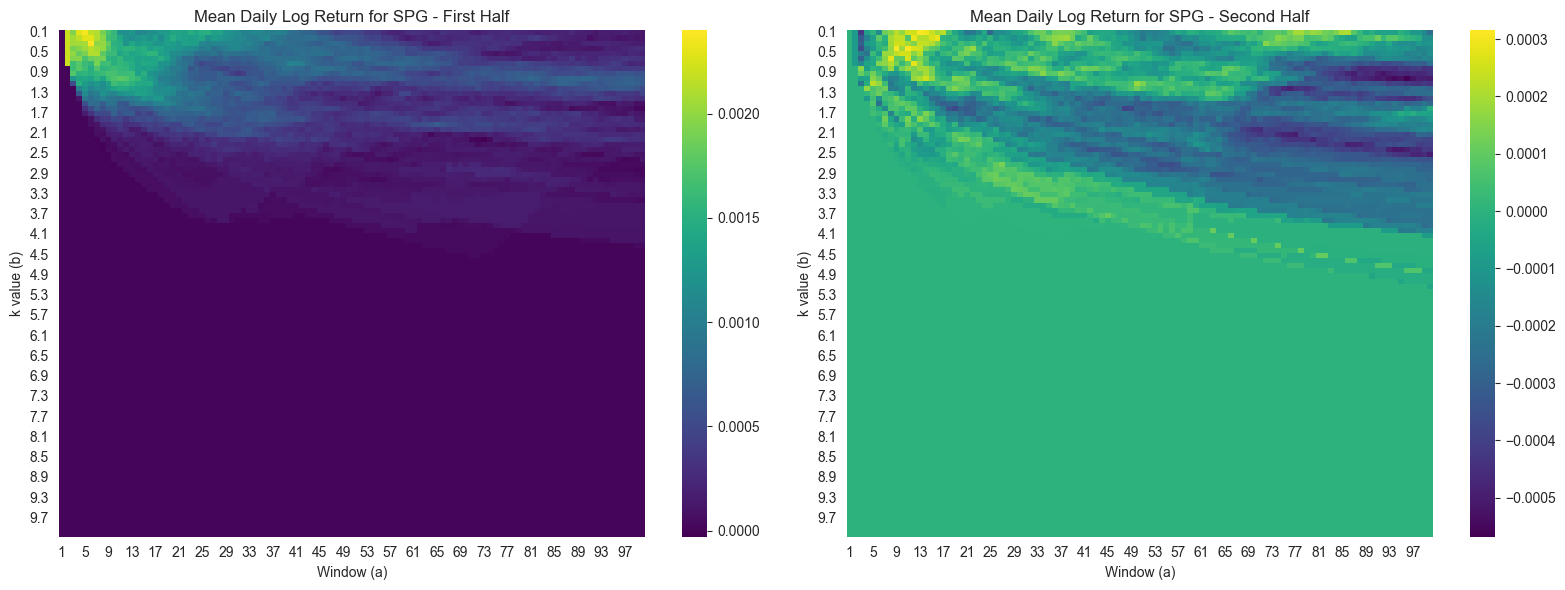

In [31]:
# Define parameter grids.
A_values = np.linspace(1, 100, 100, dtype=int)  # window values as integers
B_values = np.linspace(1, 100, 100) / 10        # k values

# Define tickers explicitly
#tickers = ["AAPL", "XOM", "JNJ", "CAT", "PG", "VZ", "BHP", "JPM","SPG", "FCX"]
tickers = ["SPG"]  

def compute_mean_log_return(df, signals, stock):
    df_copy = df.copy()
    df_copy[stock + '_log_return'] = np.log(df_copy[stock] / df_copy[stock].shift(1))
    df_copy[stock + '_Strategy_log_return'] = signals[stock + ' Signal'].shift(1) * df_copy[stock + '_log_return']
    mid = len(df_copy) // 2
    return [df_copy[stock + '_Strategy_log_return'].iloc[:mid].mean(), 
            df_copy[stock + '_Strategy_log_return'].iloc[mid:].mean()]

for stock in tickers:
    heatmap_data_1 = np.full((len(B_values), len(A_values)), np.nan)
    heatmap_data_2 = np.full((len(B_values), len(A_values)), np.nan)

    for j, b in tqdm(enumerate(B_values), total=len(B_values), desc=f"Processing {stock}"):
        for i, a in enumerate(A_values):
            # Compute signals for each parameter combination.
            signals = mean_revert_strategy(df, [stock], a, b)
            mean_return = compute_mean_log_return(df, signals, stock)
            heatmap_data_1[j, i] = mean_return[0]
            heatmap_data_2[j, i] = mean_return[1]
    # Create a DataFrame where rows correspond to k values and columns to window sizes.
    df_heatmap_1 = pd.DataFrame(heatmap_data_1, index=B_values, 
                                columns=A_values)
    df_heatmap_2 = pd.DataFrame(heatmap_data_2, index=B_values, 
                                columns=A_values)
    # Plot the heatmap.

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.heatmap(df_heatmap_1, ax=axes[0], annot=False, fmt=".4f", cmap="viridis", center=0)
    sns.heatmap(df_heatmap_2, ax=axes[1], annot=False, fmt=".4f", cmap="viridis", center=0)
    axes[0].set_title(f"Mean Daily Log Return for {stock} - First Half")
    axes[1].set_title(f"Mean Daily Log Return for {stock} - Second Half")
    axes[0].set_xlabel("Window (a)")
    axes[0].set_ylabel("k value (b)")
    axes[1].set_xlabel("Window (a)")
    axes[1].set_ylabel("k value (b)")
    plt.tight_layout()
    plt.show()

### 3. Stratégie Conditionnelle

In [32]:
def quantile_strategy(df, tickers, window, quantile):
    """
    Implements a simple quantile strategy.
    
    Args:
        df : pandas.DataFrame
            DataFrame with the adjusted close prices of stocks.
        tickers : list
            List of ticker symbols corresponding to the columns in df.
        window : int
            The time window on which the quantile is computed.
        quantile : float
            The quantile value used as threshold.
    
    Returns:
        signals : pandas.DataFrame
            DataFrame with the signals.
    """
    signals = pd.DataFrame(index=df.index)
    
    for stock in tickers:
        # Compute the rolling quantile.
        signals[stock + " Quantile"] = df[stock].pct_change().rolling(window=window).quantile(quantile/100)

        # Generate signals: 1 if price < quantile, else 0.
        signals[stock + " Signal"] = np.where(
             df[stock].pct_change() > signals[stock + " Quantile"],
            1,
            0
        )
    
    return signals

In [33]:
# On applique la stratégie à nos données
signals = quantile_strategy(df, tickers, 50, 10)
signals
## NB: il y aura toujours des NaN au début pour les MA; auquel cas le signal 
# vaudra 0 et donc pas de trade de toutes façons

,SPG Quantile,SPG Signal
Date,,
2006-01-04,NaN,0
2006-01-05,NaN,0
2006-01-06,NaN,0
2006-01-09,NaN,0
2006-01-10,NaN,0
...,...,...
2025-02-24,-0.014614,1
2025-02-25,-0.013258,1
2025-02-26,-0.011510,1


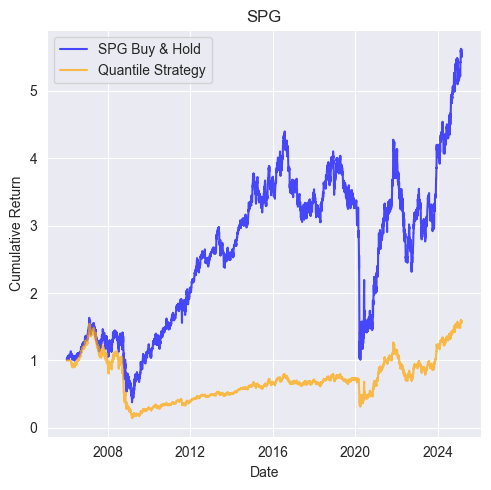

In [34]:
# On visualise pour des valeurs arbitraires de A et B 

df_question3 = df.copy()
for stock in tickers:
    df_question3.loc[:, stock + '_return'] = df_question3[stock].pct_change()
    df_question3.loc[:, stock + '_Strategy_return'] = signals[stock + ' Signal'].shift(1) * df_question3[stock + '_return']
    df_question3.loc[:, 'Cumulative_' + stock] = (1 + df_question3[stock + '_return']).cumprod()
    df_question3.loc[:, stock + '_Cumulative_Strategy'] = (1 + df_question3[stock + '_Strategy_return']).cumprod()

n_tickers = len(tickers)
ncols = 3
nrows = math.ceil(n_tickers / ncols)

# Create a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 5 * nrows), sharex=True, 
                         sharey=False)
axes = axes.flatten()  

for idx, stock in enumerate(tickers):
    ax = axes[idx]
    ax.plot(df_question3.index, df_question3['Cumulative_' + stock],
            label=stock + ' Buy & Hold', color='blue', alpha=0.7)
    ax.plot(df_question3.index, df_question3[stock + '_Cumulative_Strategy'],
            label='Quantile Strategy', color='orange', alpha=0.7)
    ax.set_title(f'{stock}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Return')
    ax.legend()
    ax.grid(True)

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Processing AAPL: 100%|██████████| 100/100 [00:40<00:00,  2.48it/s]


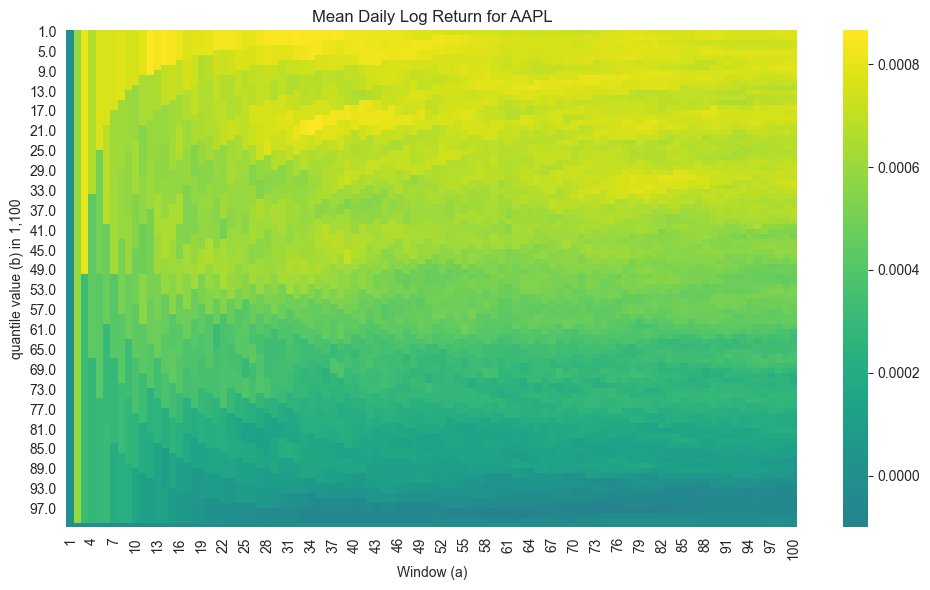

In [80]:
# Define parameter grids.
A_values = np.linspace(1, 100, 100, dtype=int)  # window values as integers
B_values = np.linspace(1, 100, 100)         # quantile values

# Define tickers explicitly.
#tickers = ["AAPL", "XOM", "JNJ", "CAT", "PG", "VZ", "BHP", "JPM","SPG", "FCX"]
tickers = ["AAPL"]  

def compute_mean_log_return(df, signals, stock):
    df_copy = df.copy()
    df_copy[stock + '_log_return'] = np.log(df_copy[stock] / df_copy[stock].shift(1))
    df_copy[stock + '_Strategy_log_return'] = signals[stock + ' Signal'].shift(1) * df_copy[stock + '_log_return']
    return df_copy[stock + '_Strategy_log_return'].mean()

for stock in tickers:
    heatmap_data = np.full((len(B_values), len(A_values)), np.nan)
    for j, b in tqdm(enumerate(B_values), total=len(B_values), desc=f"Processing {stock}"):
        for i, a in enumerate(A_values):
            # Compute signals for each parameter combination.
            signals = quantile_strategy(df, [stock], a, b)
            mean_return = compute_mean_log_return(df, signals, stock)
            heatmap_data[j, i] = mean_return

    # Create a DataFrame where rows correspond to k values and columns to window sizes.
    df_heatmap = pd.DataFrame(heatmap_data, index=B_values, columns=A_values)
    df_heatmap.replace([np.inf, -np.inf], 0, inplace=True)
    # Plot the heatmap.
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_heatmap, annot=False, fmt=".4f", cmap="viridis", center=0)
    plt.title(f"Mean Daily Log Return for {stock}")
    plt.xlabel("Window (a)")
    plt.ylabel("quantile value (b) in 1,100")
    plt.tight_layout()
    plt.show()

### 4. Diagnostique dynamique 

In [94]:
# Question 1 :  Tracer un heatmap de la performance moyenne, titre par titre (nous avons le choix de la mesure 
# de performance) de chaque stratégie mois par mois. Nous allons choisir 
# le log return mensuel comme métrique
tickers = ["AAPL", "XOM", "JNJ", "CAT", "PG", "VZ", "BHP", "JPM","SPG", 
           "FCX",'LULU']

def compute_monthly_log_return(df, signals, stock):
    df_copy = df.copy()
    df_copy[stock + '_log_return'] = np.log(df_copy[stock] / df_copy[stock].shift(1))
    df_copy[stock + '_Strategy_log_return'] = signals[stock + ' Signal'].shift(1) * df_copy[stock + '_log_return']

    # Ensure the date index is of type datetime
    df_copy.index = pd.to_datetime(df_copy.index)
    # Group by month and calculate the mean log return for each month
    monthly_log_return = (df_copy[stock + '_Strategy_log_return'].resample
                           ('ME').sum())
    return monthly_log_return



In [165]:
# On créé une fonction pour afficher la heatmap pour une stratégie donnée, définie par signals.
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LinearSegmentedColormap

colors = [(1.0, 0.0, 0.0),  # red
          (1.0, 1.0, 1.0),  # white
          (0.0, 1.0, 0.0)]  # green

rwg_cmap = LinearSegmentedColormap.from_list("RedWhiteGreen", colors, N=256)

def plot_heatmap_strategy(tickers, df, signals, strategy):
    monthly_alpha_df = pd.DataFrame()

    for stock in tickers:
        monthly_alpha = compute_monthly_log_return(df, signals, stock)
        monthly_alpha_df[stock] = monthly_alpha

    monthly_alpha_df.index = monthly_alpha_df.index.to_series().dt.strftime('%b-%Y')  

    # Print summary stats for each stock
    print("==== Summary of Winners/Losers/Zeroes ====")
    for stock in tickers:
        data = monthly_alpha_df[stock].dropna()  # drop NaNs if any
        total = len(data)
        if total == 0:
            print(f"{stock}: No data available.")
        else:
            winners = (data > 0).sum()
            losers  = (data < 0).sum()
            zeros   = (data == 0).sum()
            
            print(f"Stock: {stock}")
            print(f"  Winners: {winners / total * 100:.2f}%")
            print(f"  Losers:  {losers / total * 100:.2f}%")
            print(f"  Flat:  {zeros  / total * 100:.2f}%")

    # Global summary for all stocks combined
    # Stack the dataframe to get a Series of all values, then drop NaNs
    global_data = monthly_alpha_df.stack().dropna()
    global_total = len(global_data)
    if global_total > 0:
        global_winners = (global_data > 0).sum()
        global_losers  = (global_data < 0).sum()
        global_zeroes  = (global_data == 0).sum()

        print("==== Global Summary (All Stocks) ====")
        print(f"  Winners: {global_winners / global_total * 100:.2f}%")
        print(f"  Losers:  {global_losers / global_total * 100:.2f}%")
        print(f"  Flat:  {global_zeroes / global_total * 100:.2f}%")
    else:
        print("No global data available.")
    
    
    monthly_alpha_T = monthly_alpha_df.T

    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(monthly_alpha_T, annot=False, fmt=".4f", cmap=rwg_cmap,
                     center=0,vmin=-0.5, vmax=0.5)

    plt.xticks(rotation=45, ha='right')

    plt.title(f'Monthly Performance for the strategy {strategy}')
    plt.xlabel('Month')
    plt.ylabel('Stock')
    plt.style.use('dark_background')    
    plt.tight_layout()
    plt.show()

==== Summary of Winners/Losers/Zeroes ====
Stock: AAPL
  Winners: 58.02%
  Losers:  41.98%
  Flat:  0.00%
Stock: XOM
  Winners: 54.25%
  Losers:  45.75%
  Flat:  0.00%
Stock: JNJ
  Winners: 49.53%
  Losers:  50.47%
  Flat:  0.00%
Stock: CAT
  Winners: 50.94%
  Losers:  49.06%
  Flat:  0.00%
Stock: PG
  Winners: 55.66%
  Losers:  44.34%
  Flat:  0.00%
Stock: VZ
  Winners: 46.70%
  Losers:  53.30%
  Flat:  0.00%
Stock: BHP
  Winners: 47.64%
  Losers:  52.36%
  Flat:  0.00%
Stock: JPM
  Winners: 50.47%
  Losers:  49.53%
  Flat:  0.00%
Stock: SPG
  Winners: 57.08%
  Losers:  42.92%
  Flat:  0.00%
Stock: FCX
  Winners: 46.70%
  Losers:  53.30%
  Flat:  0.00%
Stock: LULU
  Winners: 52.83%
  Losers:  47.17%
  Flat:  0.00%
==== Global Summary (All Stocks) ====
  Winners: 51.80%
  Losers:  48.20%
  Flat:  0.00%


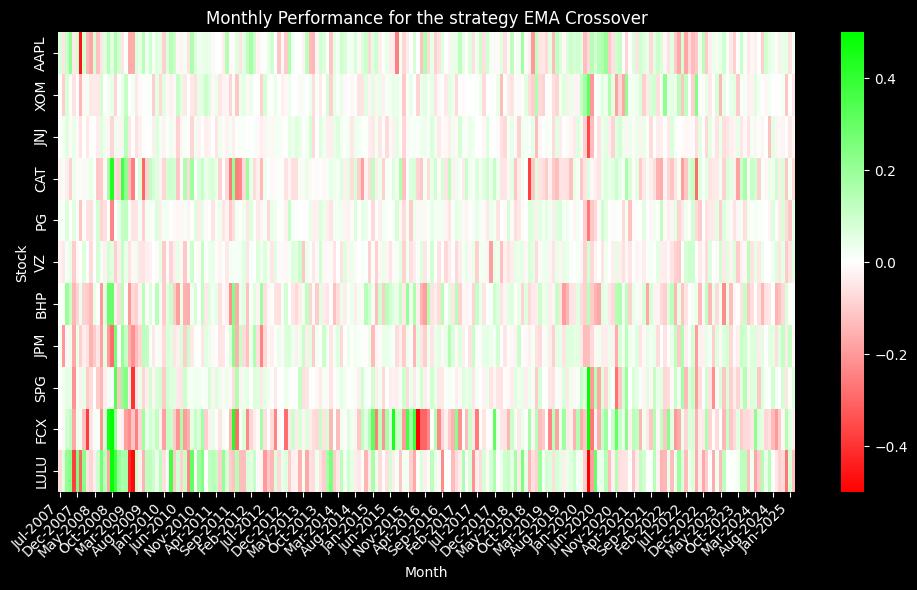

In [157]:
# On choisit des paramètres qui semblent intéressant pour l'ensemble des stocks pour cette stratégie basé sur les heatmap individuelles. 
signals_1 = ema_crossover_strategy(df, tickers, 10, 70)
plot_heatmap_strategy(tickers, df, signals_1, "EMA Crossover")

==== Summary of Winners/Losers/Zeroes ====
Stock: AAPL
  Winners: 41.51%
  Losers:  46.23%
  Flat:  12.26%
Stock: XOM
  Winners: 47.64%
  Losers:  35.85%
  Flat:  16.51%
Stock: JNJ
  Winners: 48.11%
  Losers:  37.26%
  Flat:  14.62%
Stock: CAT
  Winners: 41.51%
  Losers:  39.62%
  Flat:  18.87%
Stock: PG
  Winners: 45.28%
  Losers:  35.85%
  Flat:  18.87%
Stock: VZ
  Winners: 50.00%
  Losers:  31.60%
  Flat:  18.40%
Stock: BHP
  Winners: 48.58%
  Losers:  30.66%
  Flat:  20.75%
Stock: JPM
  Winners: 44.34%
  Losers:  40.57%
  Flat:  15.09%
Stock: SPG
  Winners: 42.92%
  Losers:  41.98%
  Flat:  15.09%
Stock: FCX
  Winners: 39.15%
  Losers:  33.96%
  Flat:  26.89%
Stock: LULU
  Winners: 39.62%
  Losers:  41.51%
  Flat:  18.87%
==== Global Summary (All Stocks) ====
  Winners: 44.43%
  Losers:  37.74%
  Flat:  17.84%


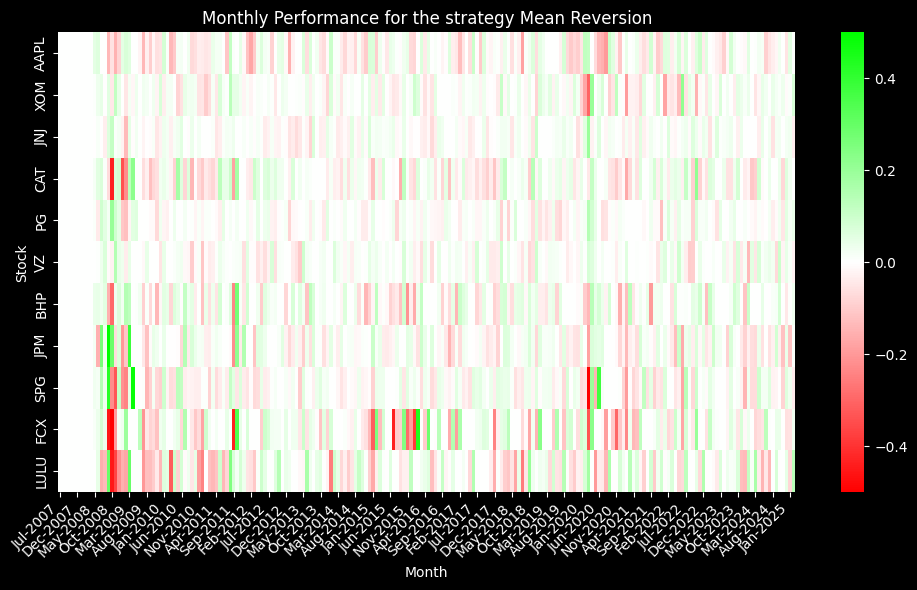

In [159]:
signals_2 = mean_revert_strategy(df, tickers, 200, 1)
plot_heatmap_strategy(tickers, df, signals_2, "Mean Reversion")

==== Summary of Winners/Losers/Zeroes ====
Stock: AAPL
  Winners: 62.74%
  Losers:  34.91%
  Flat:  2.36%
Stock: XOM
  Winners: 51.42%
  Losers:  46.23%
  Flat:  2.36%
Stock: JNJ
  Winners: 54.72%
  Losers:  42.92%
  Flat:  2.36%
Stock: CAT
  Winners: 58.02%
  Losers:  39.62%
  Flat:  2.36%
Stock: PG
  Winners: 53.77%
  Losers:  43.87%
  Flat:  2.36%
Stock: VZ
  Winners: 54.72%
  Losers:  42.92%
  Flat:  2.36%
Stock: BHP
  Winners: 49.06%
  Losers:  48.58%
  Flat:  2.36%
Stock: JPM
  Winners: 56.13%
  Losers:  41.51%
  Flat:  2.36%
Stock: SPG
  Winners: 55.66%
  Losers:  41.98%
  Flat:  2.36%
Stock: FCX
  Winners: 51.42%
  Losers:  46.23%
  Flat:  2.36%
Stock: LULU
  Winners: 52.83%
  Losers:  44.81%
  Flat:  2.36%
==== Global Summary (All Stocks) ====
  Winners: 54.59%
  Losers:  43.05%
  Flat:  2.36%


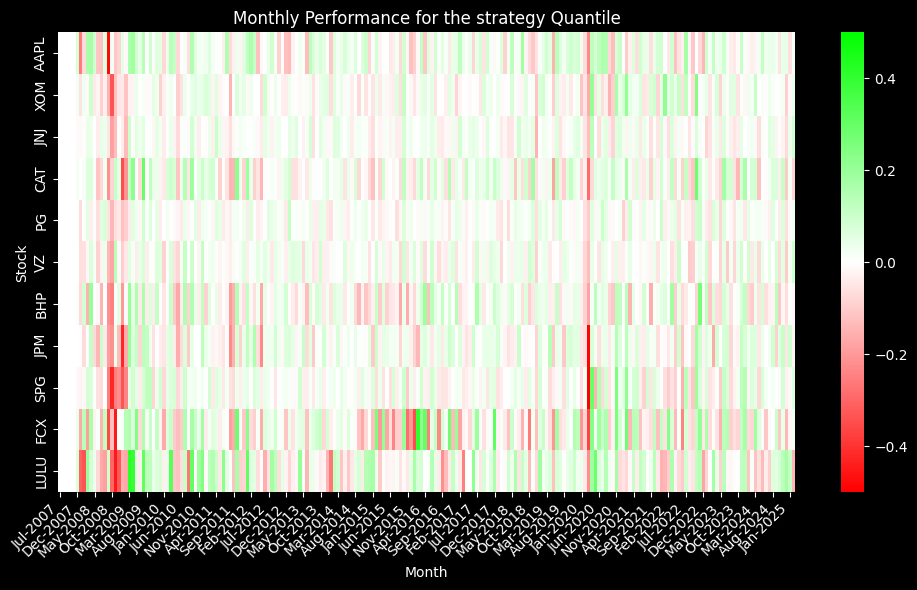

In [161]:
signals_3 = quantile_strategy(df, tickers, 100, 10)
plot_heatmap_strategy(tickers, df, signals_3, "Quantile")

==== Summary of Winners/Losers/Zeroes ====
Stock: AAPL
  Winners: 58.33%
  Losers:  41.67%
  Flat:  0.00%
Stock: XOM
  Winners: 50.00%
  Losers:  50.00%
  Flat:  0.00%
Stock: JNJ
  Winners: 50.00%
  Losers:  50.00%
  Flat:  0.00%
Stock: CAT
  Winners: 58.33%
  Losers:  41.67%
  Flat:  0.00%
Stock: PG
  Winners: 58.33%
  Losers:  41.67%
  Flat:  0.00%
Stock: VZ
  Winners: 41.67%
  Losers:  58.33%
  Flat:  0.00%
Stock: BHP
  Winners: 75.00%
  Losers:  25.00%
  Flat:  0.00%
Stock: JPM
  Winners: 75.00%
  Losers:  25.00%
  Flat:  0.00%
Stock: SPG
  Winners: 41.67%
  Losers:  58.33%
  Flat:  0.00%
Stock: FCX
  Winners: 66.67%
  Losers:  33.33%
  Flat:  0.00%
Stock: LULU
  Winners: 58.33%
  Losers:  41.67%
  Flat:  0.00%
==== Global Summary (All Stocks) ====
  Winners: 57.58%
  Losers:  42.42%
  Flat:  0.00%


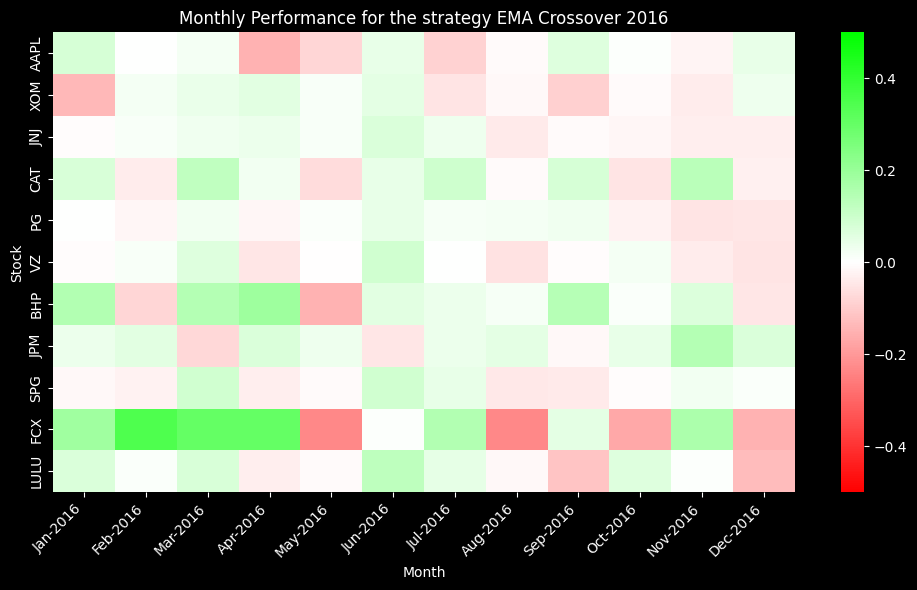

In [162]:
# Question 2 : Est-ce que la diversité de nos stratégies rend compte de la dynamique des marchés génériquement, et plus
# particulièrement en 2016 ?

df_2016 = df.loc['2016-01-01':'2016-12-31']
signals_1_2016 = ema_crossover_strategy(df_2016, tickers, 10, 70)
plot_heatmap_strategy(tickers, df_2016, signals_1_2016, "EMA Crossover 2016")

==== Summary of Winners/Losers/Zeroes ====
Stock: AAPL
  Winners: 33.33%
  Losers:  25.00%
  Flat:  41.67%
Stock: XOM
  Winners: 25.00%
  Losers:  25.00%
  Flat:  50.00%
Stock: JNJ
  Winners: 16.67%
  Losers:  25.00%
  Flat:  58.33%
Stock: CAT
  Winners: 16.67%
  Losers:  25.00%
  Flat:  58.33%
Stock: PG
  Winners: 41.67%
  Losers:  16.67%
  Flat:  41.67%
Stock: VZ
  Winners: 16.67%
  Losers:  33.33%
  Flat:  50.00%
Stock: BHP
  Winners: 25.00%
  Losers:  25.00%
  Flat:  50.00%
Stock: JPM
  Winners: 8.33%
  Losers:  33.33%
  Flat:  58.33%
Stock: SPG
  Winners: 25.00%
  Losers:  33.33%
  Flat:  41.67%
Stock: FCX
  Winners: 33.33%
  Losers:  8.33%
  Flat:  58.33%
Stock: LULU
  Winners: 41.67%
  Losers:  8.33%
  Flat:  50.00%
==== Global Summary (All Stocks) ====
  Winners: 25.76%
  Losers:  23.48%
  Flat:  50.76%


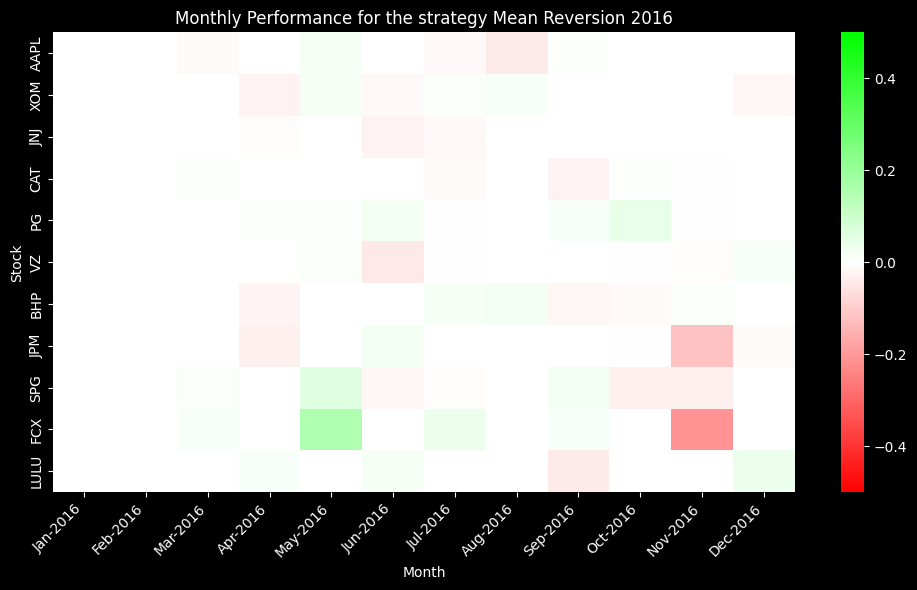

In [163]:
signals_2_2016 = mean_revert_strategy(df_2016, tickers, 50, 2)
plot_heatmap_strategy(tickers, df_2016, signals_2_2016, "Mean Reversion 2016")

==== Summary of Winners/Losers/Zeroes ====
Stock: AAPL
  Winners: 58.33%
  Losers:  25.00%
  Flat:  16.67%
Stock: XOM
  Winners: 50.00%
  Losers:  33.33%
  Flat:  16.67%
Stock: JNJ
  Winners: 41.67%
  Losers:  41.67%
  Flat:  16.67%
Stock: CAT
  Winners: 50.00%
  Losers:  33.33%
  Flat:  16.67%
Stock: PG
  Winners: 50.00%
  Losers:  33.33%
  Flat:  16.67%
Stock: VZ
  Winners: 33.33%
  Losers:  50.00%
  Flat:  16.67%
Stock: BHP
  Winners: 58.33%
  Losers:  25.00%
  Flat:  16.67%
Stock: JPM
  Winners: 66.67%
  Losers:  16.67%
  Flat:  16.67%
Stock: SPG
  Winners: 33.33%
  Losers:  50.00%
  Flat:  16.67%
Stock: FCX
  Winners: 33.33%
  Losers:  50.00%
  Flat:  16.67%
Stock: LULU
  Winners: 41.67%
  Losers:  41.67%
  Flat:  16.67%
==== Global Summary (All Stocks) ====
  Winners: 46.97%
  Losers:  36.36%
  Flat:  16.67%


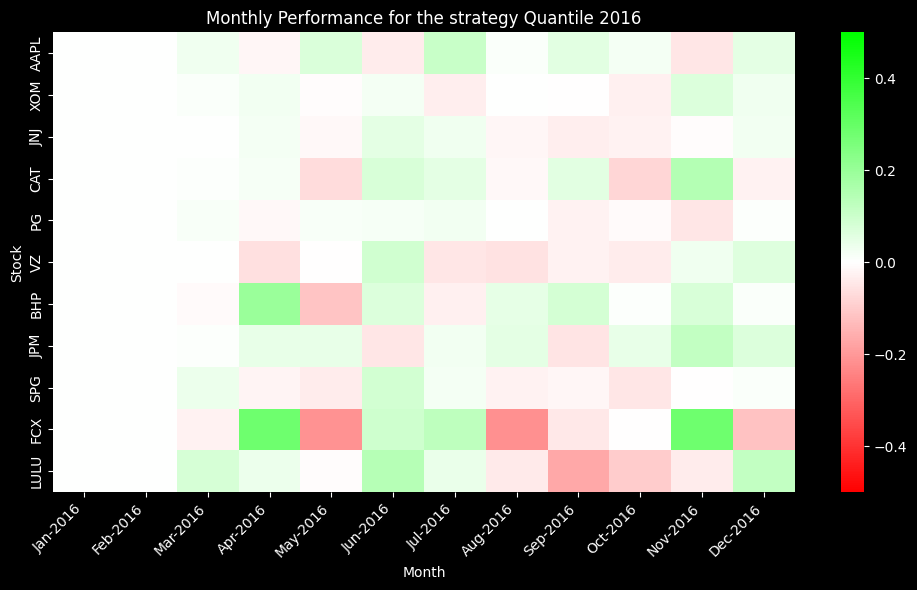

In [164]:
signals_3_2016 = quantile_strategy(df_2016, tickers, 50, 20)
plot_heatmap_strategy(tickers, df_2016, signals_3_2016, "Quantile 2016")